## Deliverables and Points Distribution

### Q1: Classification with Two Layer NN

- **1.1 NN Implementation**

  - Leaky_ReLU

  - Softmax

  - Cross Entropy loss

  - dropout

  - forward propagation and with and without dropout

  - compute gradients and update weights

  - backward without momentum

  - Gradient Descent

  - Batch Gradient Descent

  - Momentum

- **1.2 Loss plot and CE for Gradient Descent**

- **1.3 Loss plot and CE for Batch Gradient Descent**

- **1.4 Loss plot and CE value for NN with Gradient Descent with Momentum**

### Q2: CNN

- **2.1 Image Classification using Pytorch CNN**

  - 2.1.1 Loading the Model

  - 2.1.3 Building the Model

  - 2.1.4 Training the Model

  - 2.1.5 Examining Accuracy and Loss

- **2.2 Exploring Deep CNN Architectures**

### Q3: Random Forest

- 3.1 Random Forest Implementation

- 3.2 Hyperparameter Tuning with a Random Forest

- 3.3 Plotting Feature Importance

### Q4: SVM

- 4.1: Fitting an SVM Classifier by hand

- 4.2: Feature Mapping


## Environment Setup


In [ ]:
import sys
import time
from collections import Counter
from math import log2, sqrt

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from NN import NeuralNet
from scipy import stats
from sklearn import svm
from sklearn.datasets import fetch_california_housing, load_diabetes, make_moons
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from utilities.utils import get_housing_dataset

print("Version information")

print("python: {}".format(sys.version))
print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

Version information
python: 3.11.9 (main, Apr 19 2024, 11:43:47) [Clang 14.0.6 ]
matplotlib: 3.8.4
numpy: 1.26.4
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[codecarbon INFO @ 18:22:14] Energy consumed for RAM : 0.221384 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:22:14] Energy consumed for all CPUs : 0.369039 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:22:14] 0.590423 kWh of electricity used since the beginning.


## Coding and Emissions

Coding and computational research contribute to greenhouse gas emissions. The main source of these emissions is the power draw of computers during compute- and data-intensive computational analyses. In 2020, the sector of information and communication technologies was responsible for between 1.8% and 2.8% of GHG emissions, surprisingly more than the sector of aviation <sup>[<a href="https://www.nature.com/articles/s43588-023-00506-2">1</a>]</sup>. Machine learning models, especially large ones, can consume significant amounts of energy during training and inference, which contributes to greenhouse gas emissions. Artificial intelligence, including large language models, is also a significant emitter of carbon <sup>[<a href="https://www.nature.com/articles/s42256-022-00529-w">2</a>]</sup>.

Carbon footprint of coding impacts several Sustainable Development Goals (SDGs), particularly SDG 13 (Climate Action) and SDG 12 (Responsible Consumption and Production).<sup>[<a href="https://www.undp.org/sustainable-development-goals">3</a>]</sup> This means writing clean and efficient code transcends functionality—it’s an environmental imperative. As coders, we can play a role in mitigating this impact.

### Measuring Our Impact:

CodeCarbon estimates the amount of CO2 produced by the cloud or personal computing resources used to execute the code<sup>[<a href="https://codecarbon.io/">4</a>]</sup> .

Using CodeCarbon in your upcoming assignment will help you understand the environmental impact of your code and explore ways to reduce it.


In [ ]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 18:22:19] [setup] RAM Tracking...
[codecarbon INFO @ 18:22:19] [setup] GPU Tracking...
[codecarbon INFO @ 18:22:20] No GPU found.
[codecarbon INFO @ 18:22:20] [setup] CPU Tracking...
[codecarbon INFO @ 18:22:20] Energy consumed for RAM : 0.222080 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:22:20] Energy consumed for all CPUs : 0.370200 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:22:20] 0.592281 kWh of electricity used since the beginning.
[codecarbon WARNING @ 18:22:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 18:22:23] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 18:22:23] >>> Tracker's metadata:
[codecarbon INFO @ 18:22:23]   Platform system: macOS-14.1.1-arm64-i386-64bit
[codecarbon INFO @ 18:22:23]   Python version: 3.11.9
[codecarbon INFO @ 18:22:23]   CodeCarbon version: 2.5.0
[codecarbon INFO @ 18:22:23]   Available RAM : 8.000 GB
[codecarbon INFO @ 18:22:23]   CPU count: 8
[codecarbon INF

[codecarbon INFO @ 18:22:29] Energy consumed for RAM : 0.221396 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:22:29] Energy consumed for all CPUs : 0.369060 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:22:29] 0.590456 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:22:35] Energy consumed for RAM : 0.222093 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:22:35] Energy consumed for all CPUs : 0.370221 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:22:35] 0.592314 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:22:41] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:22:41] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:22:41] 0.000033 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:22:44] Energy consumed for RAM : 0.221409 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:22:44] Energy consumed for all CPUs : 0.369081 kWh. Total CPU Power : 5.0 W
[codecarbon

# 1: Two Layer Neural Network [80 pts; 55pts + 25pts Grad / 3.3% Undergrad Bonus] <span style="color:blue">**[P]**</span><span style="color:green">**[W]**</span>


## 1.1 NN Implementation [65pts; 50pts + 15pts Grad / 2% Bonus for Undergrad] <span style="color:blue">**[P]**</span>

In this section, you will implement a two layer fully connected neural network to perform a Classification Task. You will also experiment with different activation functions and optimization techniques. We provide two activation functions here - Leaky Relu and Softmax. You will implement a neural network where the first hidden layer uses a Leaky ReLU activation and the output layer uses Softmax.

You'll also implement Gradient Descent (GD) and Batch Gradient Descent (BGD) algorithms for training these neural nets. **GD is mandatory for all. BGD is bonus for undergraduate students but mandatory for graduate students.**

In the <strong>NN.py</strong> file, complete the following functions:

- <strong>leaky_ReLU</strong>
- <strong>softmax</strong>
- <strong>cross_entropy_loss</strong>
- <strong>\_dropout</strong>
- <strong>forward</strong>
- <strong>compute_gradients</strong>
- <strong>update_weights</strong>
- <strong>backward</strong>
- <strong>gradient_descent</strong>
- <strong>batch_gradient_descent</strong>:<span style="color:darkred"> **Mandatory for graduate students, bonus for undergraduate students.**</span> Please batch your data in a wraparound manner. For example, given a dataset of 9 numbers, [1, 2, 3, 4, 5, 6, 7, 8, 9], and a batch size of 6, the first iteration batch will be [1, 2, 3, 4, 5, 6], the second iteration batch will be [7, 8, 9, 1, 2, 3], the third iteration batch will be [4, 5, 6, 7, 8, 9], etc...

We'll train this neural network on sklearn's California Housing dataset.


## Activation Function

There are many activation functions that are used for various purposes. For this question, we use leaky ReLU and the softmax activation functions. We encourage you to explore the plethora of options, many of which are listed on [Wikipedia](https://en.wikipedia.org/wiki/Activation_function).


### Sigmoid

The sigmoid function is a non-linear function with an S-shaped curve and is regarded as a foundational activation function. Its output is in the range $(0, 1)$, making it the function to use for binary classification output. The function is expressed as $$o = \phi(u)=\frac{1}{1+e^{-u}}$$<br> The derivation of the sigmoid function is given by $$o' = \phi'(u) = \frac{1}{1+e^{-u}} \left(1-\frac{1}{1+e^{-u}}\right) = o(1-o)$$

<b>Note:</b> We do not use sigmoid in this homework; it is only included for the sake of completeness.

![sigmoid](data/images/sigmoid.png)


### Softmax

Softmax is a common activation function used in neural networks, especially for multiclass classification problems like the one we are tackling. It is used to convert a vector of raw outputs from the last layer of the Neural Network into a probability distribution over multiple classes. The softmax function takes as input a vector of real numbers and transforms them into a probability distribution, ensuring that the probabilities sum to 1.

Mathematically, given an input vector of [x1, x2, ..., xn], the softmax function calculates the probability p(y=i) for each class i as follows:

p(y=i) = $e^{xi} / (e^{x1} + e^{x2} + ... + e^{xn})$

![sigmoid](data/images/softmax.png)

As discussed in class, the equation that we will use in this Neural network accounts for both the x values and the weights:

![sigmoid](data/images/softmaxNew.jpg)

<strong>TODO:</strong> Implement the function <strong>softmax</strong> in <strong>NN.py</strong>.


In [ ]:
from utilities.localtests import TestNN

TestNN("test_softmax").test_softmax()

[codecarbon INFO @ 18:27:47] Energy consumed for RAM : 0.221659 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:27:47] Energy consumed for all CPUs : 0.369500 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:27:47] 0.591159 kWh of electricity used since the beginning.


test_softmax passed!


[codecarbon INFO @ 18:27:52] Energy consumed for RAM : 0.222355 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:27:52] Energy consumed for all CPUs : 0.370661 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:27:52] 0.593016 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:27:58] Energy consumed for RAM : 0.000275 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:27:58] Energy consumed for all CPUs : 0.000460 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:27:58] 0.000735 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:28:02] Energy consumed for RAM : 0.221672 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:28:02] Energy consumed for all CPUs : 0.369521 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:28:02] 0.591192 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:28:07] Energy consumed for RAM : 0.222368 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:28:07] Energy consumed for all CPUs : 0.370681 kWh. Total CPU Power : 5.0 W
[codecarbon

### ReLU and Leaky ReLU

The rectified linear unit (ReLU) is the most commonly used activation function in deep learning today. It takes the form $$o = \phi(u) = \max(0,u).$$ Note that ReLU can be computed very quickly due to its simplicity. The derivative of ReLU is given by $$o' = \phi'(u) = \begin{cases}
0& u \leq 0 \\
1& u > 0
\end{cases}.$$

![ReLU](data/images/relu.png)

Unfortunately, ReLU loses information for negative inputs; it always returns zero. For this reason, some researchers use a variant called leaky ReLU. Unlike ReLU, its leaky counterpart has a small slope (such as $\alpha = 0.05$) for negative inputs instead of a flat slope.

It takes the form

$$
o = \phi(u) = \begin{cases}
    \alpha u & u \leq 0 \\
    u & u > 0
\end{cases}
$$

In this homework, we implement Leaky ReLU.

![Leaky ReLU](data/images/leaky_relu.png)

<strong>TODO:</strong> Implement the function <strong>leaky_ReLU</strong> in <strong>NN.py</strong>.


In [ ]:
from utilities.localtests import TestNN

TestNN("test_leaky_relu").test_leaky_relu()
TestNN("test_d_leaky_relu").test_d_leaky_relu()

[codecarbon INFO @ 18:40:14] Energy consumed for RAM : 0.000888 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:40:14] Energy consumed for all CPUs : 0.001482 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:40:14] 0.002370 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:40:17] Energy consumed for RAM : 0.222284 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:40:17] Energy consumed for all CPUs : 0.370542 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:40:17] 0.592826 kWh of electricity used since the beginning.


test_leaky_relu passed!
test_d_leaky_relu passed!


[codecarbon INFO @ 18:40:22] Energy consumed for RAM : 0.222980 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:40:22] Energy consumed for all CPUs : 0.371702 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:40:22] 0.594682 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:40:29] Energy consumed for RAM : 0.000900 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:40:29] Energy consumed for all CPUs : 0.001503 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:40:29] 0.002403 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:40:29] 0.001007 g.CO2eq/s mean an estimation of 31.767393338545013 kg.CO2eq/year
[codecarbon INFO @ 18:40:32] Energy consumed for RAM : 0.222296 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:40:32] Energy consumed for all CPUs : 0.370563 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:40:32] 0.592859 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:40:37] Energy consumed for RAM : 0.222992 kWh. RAM Power : 3.0 W
[codec

### Perceptron

A single layer perceptron can be thought of as a linear hyperplane as in logistic regression followed by a non-linear activation function. $$u_{i} = \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i}$$ $$o_{i} = \phi \left( \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i} \right) = \phi(\theta_{i}^{T}x+b_{i})$$ where $x$ is a d-dimensional vector i.e. $x \in R^{d}$. It is one datapoint with $d$ features. $\theta_{i} \in R^{d}$ is the weight vector for the $i^{th}$ hidden unit, $b_{i} \in R$ is the bias element for the $i^{th}$ hidden unit and $\phi(.)$ is a non-linear activation function that has been described below. $u_{i}$ is a linear combination of the features in $x_j$ weighted by $\theta_{i}$ whereas $o_{i}$ is the $i^{th}$ output unit from the activation layer.


## Fully connected Layer

Typically, a modern neural network contains millions of perceptrons as the one shown in the previous image. Perceptrons interact in different configurations such as cascaded or parallel. In this part, we describe a fully connected layer configuration in a neural network which comprises multiple parallel perceptrons forming one layer.

We extend the previous notation to describe a fully connected layer. Each layer in a fully connected network has a number of input/hidden/output units cascaded in parallel. Let us a define a single layer of the neural net as follows: <br>
$m$ denotes the number of hidden units in a single layer $l$ whereas $n$ denotes the number of units in the previous layer $l-1$.
$$u^{[l]}=\theta^{[l]}o^{[l-1]}+b^{[l]}$$
where $u^{[l]} \in R^{m}$ is a m-dimensional vector pertaining to the hidden units of the $l^{th}$ layer of the neural network after applying linear operations. Similarly, $o^{[l-1]} \in R^{n}$ is the n-dimensional output vector corresponding to the hidden units of the $(l-1)^{th}$ activation layer. $\theta^{[l]} \in R^{m \times n}$ is the weight matrix of the $l^{th}$ layer where each row of $\theta^{[l]}$ is analogous to $\theta_{i}$ described in the previous section i.e. each row corresponds to one hidden unit of the $l^{th}$ layer. $b^{[l]} \in R^{m}$ is the bias vector of the layer where each element of b pertains to one hidden unit of the $l^{th}$ layer. This is followed by element wise non-linear activation function $o^{[l]} = \phi(u^{[l]})$.
The whole operation can be summarized as,
$$o^{[l]} = \phi(\theta^{[l]}o^{[l-1]}+b^{[l]}) $$
where $o^{[l-1]}$ is the output of the previous layer.


## Dropout

A dropout layer is a regularization technique used in neural networks to reduce overfitting. During training, a dropout layer looks at each input unit and randomly decide if it will be dropped (set to zero) with some given probability $p$. The decision for each unit is made independently. Formally, given an input of shape $N \times K$ (where $N$ is the number of data points and $K$ is the number of features), it samples from $\text{Bernoulli}(p)$ for each unit, resulting in an output where approximately $pNK$ of the units are zero (in expectation). This forces the network to learn more robust and generalizable features, since it cannot rely too much on any particular input. During inference, the dropout layer is turned off, and the full network is used to make predictions.

The dropout probability $p$ is a hyperparameter than can be tuned to adjust the strength of regularization. Setting $p=0$ is equivalent to no dropout.

Note that the derivative of $\text{dropout}(u)$ with respect to $u$ has the same shape as $u$. The values of the derivative depend on the random mask.

Use [this](https://d2l.ai/chapter_multilayer-perceptrons/dropout.html) as a reference for your implementation.

Note that after applying the mask, we must scale the result by a factor of $1/(1-p)$. Why is this necessary?

<strong>TODO:</strong> Implement the <strong>\_dropout</strong> function in <strong>NN.py</strong>.


In [ ]:
from utilities.localtests import TestNN

TestNN("test_dropout").test_dropout()

test_dropout passed!


[codecarbon INFO @ 18:41:22] Energy consumed for RAM : 0.223030 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:41:22] Energy consumed for all CPUs : 0.371786 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:41:22] 0.594815 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:41:29] Energy consumed for RAM : 0.000950 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:41:29] Energy consumed for all CPUs : 0.001586 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:41:29] 0.002537 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:41:32] Energy consumed for RAM : 0.222346 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 18:41:32] Energy consumed for all CPUs : 0.370646 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 18:41:32] 0.592993 kWh of electricity used since the beginning.
[codecarbon INFO @ 18:41:32] 0.001009 g.CO2eq/s mean an estimation of 31.81660032081532 kg.CO2eq/year
[codecarbon INFO @ 18:41:37] Energy consumed for RAM : 0.223042 kWh. RAM Power : 3.0 W
[codeca

## Cross Entropy Loss

Cross-Entropy Loss is a widely used loss function in machine learning and deep learning, especially for classification tasks. It measures the dissimilarity between the predicted probability distribution and the true probability distribution of a classification problem. If it is closer to zero, the better the learnt function is.

### Implementation details

For classification problems as in this exercise, we compute the loss as follows:

\begin{align*}
CE = -\frac{1}{N}\sum\limits_{i=1}^{N}\left(y_{i} \cdot log(\hat{y_{i}})\right)
\end{align*}

where $y_{i}$ is the true label and $\hat{y_{i}}$ is the estimated label.

<strong>TODO:</strong> Implement the <strong>cross_entropy_loss</strong> function in <strong>NN.py</strong>.


In [ ]:
from utilities.localtests import TestNN

TestNN("test_loss").test_loss()

[codecarbon INFO @ 19:05:55] Energy consumed for RAM : 0.224255 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:05:57] Energy consumed for all CPUs : 0.373833 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:05:57] 0.598089 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:06:00] Energy consumed for RAM : 0.002175 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:00] Energy consumed for all CPUs : 0.003630 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:01] 0.005805 kWh of electricity used since the beginning.


test_loss passed!


[codecarbon INFO @ 19:06:04] Energy consumed for RAM : 0.223571 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:04] Energy consumed for all CPUs : 0.372690 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:04] 0.596261 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:06:10] Energy consumed for RAM : 0.224266 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:10] Energy consumed for all CPUs : 0.373851 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:10] 0.598117 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:06:15] Energy consumed for RAM : 0.002187 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:15] Energy consumed for all CPUs : 0.003649 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:15] 0.005836 kWh of electricity used since the beginning.


## Neural Network Architecture

_The architecture of our neural network._

![Neural Network](data/images/nn_architecture.png)

The above diagram shows the dimensions of the neural network you will implement, along with the relationships between the quantities. Note that the neural network consists of two linear layers, with a leaky ReLU activation in between. The logits outputted by the second linear layer are passed through the softmax function, which turns them into probability distributions over the 3 classes.

Here is a helpful [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) that walks through the matrix multiplication operations and shapes involved in a forward and backward pass.


## Initialization

We start by initializing the weights of the fully connected layer using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf). (At a high level, we are using a uniform distribution for weight initialization). This is already implemented for you.

## Forward Propagation

During training, we pass all data points through the network, layer by layer, using forward propagation. The equations for forward propagation are as follows:
\begin{align*}
u^{[0]} &= x\\
u^{[1]}&= \theta^{[1]}u^{[0]}+b^{[1]} \\
o^{[1]}&= \text{Dropout}(\text{LeakyRelu}(u^{[1]})) \\
u^{[2]}&= \theta^{[2]}o^{[1]}+b^{[2]} \\
\hat{y}=o^{[2]}&= \text{Softmax}(u^{[2]}).
\end{align*}

We then use the output of the network to compute the loss
\begin{align*}
CE = -\frac{1}{N}\sum\limits_{i=1}^{N}\left(y_{i} \cdot log(\hat{y_{i}})\right)
\end{align*}

<strong>TODO:</strong> Implement the <strong>forward</strong> function in <strong>NN.py</strong>.


Hint: Refer to this [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) for more detail on the forward pass.


In [ ]:
from utilities.localtests import TestNN

TestNN("test_forward_without_dropout").test_forward_without_dropout()
TestNN("test_forward").test_forward()

test_forward_without_dropout passed!
test_forward passed!


[codecarbon INFO @ 19:06:19] Energy consumed for RAM : 0.223584 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:19] Energy consumed for all CPUs : 0.372711 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:19] 0.596294 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:06:25] Energy consumed for RAM : 0.224278 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:25] Energy consumed for all CPUs : 0.373872 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:25] 0.598150 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:06:30] Energy consumed for RAM : 0.002199 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:06:30] Energy consumed for all CPUs : 0.003670 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:06:30] 0.005869 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:06:30] 0.001006 g.CO2eq/s mean an estimation of 31.718755469768638 kg.CO2eq/year
[codecarbon INFO @ 19:06:34] Energy consumed for RAM : 0.223596 kWh. RAM Power : 3.0 W
[codec

## Backward Propagation: Update Weights and Compute Gradients

After the forward pass, we do back propagation to update the weights and biases in the direction of the negative gradient of the loss function.

### Update Weights

So, we update the weights and biases using the following formulas
\begin{align*}
\theta^{[2]} := \theta^{[2]} - lr \times \frac{\partial l}{\partial \theta^{[2]}} \\
b^{[2]} := b^{[2]} - lr \times \frac{\partial l}{\partial b^{[2]}} \\
\theta^{[1]} := \theta^{[1]} - lr \times \frac{\partial l}{\partial \theta^{[1]}} \\
b^{[1]} := b^{[1]} - lr \times \frac{\partial l}{\partial b^{[1]}}
\end{align*}
where $lr$ is the learning rate. It decides the step size we want to take in the direction of the negative gradient.

<strong>TODO:</strong> Implement the <strong>update_weights</strong> function in <strong>NN.py</strong> with use_momentum=False.

Hint: Refer to this [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) for more detail on the backward pass.

In [ ]:
from utilities.localtests import TestNN

TestNN("test_update_weights").test_update_weights()

test_update_weights passed!


### Update Weights with Momentum [Bonus for Undergrad]

Gradient descent does a generally good job of facilitating the convergence of the model's parameters to minimize the loss function. However, the process of doing so can be slow and/or noisy. **Momentum** is a technique used to stabilize this convergence.

As a reminder, vanilla gradient descent applies the following update function to the parameters:

$$
\begin{equation}
\theta_{t+1} = \theta_t - \alpha \nabla f(\theta_t)
\end{equation}
$$

where $\theta_t$ represents the parameters at time $t$, $\alpha$ represents the learning rate, and $f$ is the loss function.

Momentum proposes the following tweak to our parameter update function:

$$
\begin{align*}
z_{t+1} &= \beta z_t + \nabla f(\theta_t) \\
\theta_{t+1} &= \theta_t - \alpha z_{t+1}
\end{align*}
$$

where $\beta \in [0, 1]$ is the momentum constant and $z_t$ represents the momentum records at time $t$.

You can think of momentum as taking our previous changes into consideration. If we've been moving in a certain direction recently, it's likely we should keep moving in that direction. The recurrence relation given shows that we use an exponentially-weighted average of the previous updates for our current update.

A useful analogy about momentum from [this great article on Distill](https://distill.pub/2017/momentum/):

> Here’s a popular story about momentum: gradient descent is a man walking down a hill. He follows the steepest path downwards; his progress is slow, but steady. Momentum is a heavy ball rolling down the same hill. The added inertia acts both as a smoother and an accelerator, dampening oscillations and causing us to barrel through narrow valleys, small humps and local minima.

<strong>TODO:</strong> Implement the <strong>update_weights</strong> function in <strong>NN.py</strong> with use_momentum=True.

**HINT**: $z$ is stored in `self.change`


In [ ]:
from utilities.localtests import TestNN

TestNN("test_update_weights_with_momentum").test_update_weights_with_momentum()

test_update_weights_with_momentum passed!


[codecarbon INFO @ 19:08:04] Energy consumed for RAM : 0.223671 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:08:04] Energy consumed for all CPUs : 0.372857 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:08:04] 0.596528 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:08:10] Energy consumed for RAM : 0.224366 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:08:10] Energy consumed for all CPUs : 0.374018 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:08:10] 0.598384 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:08:15] Energy consumed for RAM : 0.002287 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:08:15] Energy consumed for all CPUs : 0.003816 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:08:15] 0.006103 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:08:19] Energy consumed for RAM : 0.223684 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:08:19] Energy consumed for all CPUs : 0.372877 kWh. Total CPU Power : 5.0 W
[codecarbon

### Compute Gradients


In order to compute the gradients of the loss with respect to each parameter, we use the equations that make up the forward pass:
\begin{align*}
u_1 &= \theta_1 X + b_1 \\
o_1 &= \text{leaky\_relu}(u_1) \\
u_2 &= \theta_2 o_1 + b_2 \\
o_2 &= \text{softmax}(u_2) \\
l &= \text{cross\_entropy}(o_2)
\end{align*}

When computing gradients, we travel backwards from the loss all the way back ot the input. We first seek to obtain the derivative of the loss $l$ with respect to the logits $u_2$. Note that they have the relation $$ l = \text{cross\_entropy}(\text{softmax}(u_2))$$. Computing the derivative of this seems very involved, but it actually has a very elegant result: $$ \frac{\partial l}{\partial u_2} = \text{softmax}(u_2) - y = \hat{y} - y. $$ While this is given to you, we encourage you to derive it for yourself! You can find a great explanation of the derivation [in this article](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1).

Now that we have $\frac{\partial l}{\partial u_2}$, we seek to move further back and compute $\frac{\partial l}{\partial \theta_2}$ and $\frac{\partial l}{\partial b_2}$. This is done using the chain rule:
\begin{align*}
\frac{\partial l}{\partial \theta_2} &= \frac{\partial l}{\partial u_2} \cdot \frac{\partial u_2}{\partial \theta_2} \\
\frac{\partial l}{\partial b_2} &= \frac{\partial l}{\partial u_2} \cdot \frac{\partial u_2}{\partial b_2}.
\end{align*}

The quantities $\frac{\partial u_2}{\partial \theta_2}$ and $\frac{\partial u_2}{\partial b_2}$ are easy to derive from the relation $u_2 = \theta_2 o_1 + b_2$. We see that
\begin{align*}
\frac{\partial l}{\partial \theta_2} &= \frac{\partial l}{\partial u_2} \cdot o_1 \\
\frac{\partial l}{\partial b_2} &= \frac{\partial l}{\partial u_2} \cdot 1.
\end{align*}

Note that the derivative involves $o_1$, which we computed during the forward pass. Fortunately, we saved that value in `self.cache`, so we don't need to compute it again!

The same procedure is repeated to obtain the gradients for the upstream parameters $\theta_1$ and $b_1$. We must first perform the intermediate steps of computing the derivative of the loss with respect to $o_1$ and then $u_1$. These are given by
\begin{align*}
\frac{\partial l}{\partial o_1} &= \frac{\partial l}{\partial u_2} \cdot \theta_2 \\
\frac{\partial l}{\partial u_1} &= \frac{\partial l}{\partial o_1} \cdot \frac{\partial\,\text{leaky\_relu}}{\partial u_1}.
\end{align*}

In the second relation, we must consider our use of dropout! If we applied dropout on a particular neuron, it should not be adjusted. To account for this, in the case of `use_dropout=True`, we must instead use $$ \frac{\partial l}{\partial u_1} = \frac{\partial l}{\partial o_1} \cdot \frac{\partial\,\text{leaky\_relu}}{\partial u_1} \cdot \text{dropout\_mask} \cdot \frac{1}{1-p}, $$ where $1 / (1-p)$ is the scaling factor and dropout_mask is stored in `self.cache`.

The final step! We can use these values to compute the gradients for $\theta_1$ and $b_1$, using the relation $u_1 = \theta_1 X + b_1$, which are given by
\begin{align*}
\frac{\partial l}{\partial \theta_1} &= \frac{\partial l}{\partial u_1} \cdot X \\
\frac{\partial l}{\partial b_1} &= \frac{\partial l}{\partial u_1} \cdot 1.
\end{align*}


### Implementation Tips

The above equations are given in matrix notation. When implementing these computations in code, the easiest way to make sure you are calculating the values correctly and in the right order is to check shapes. Any time you are doing a matrix/vector operation in NumPy, **check the shapes**.

Since we are computing these gradients over $N$ data points, we must divide the gradients by $N$ to take the _average_ gradient. Make sure you are dividing by $N$ exactly once, no more and no less!

<strong>TODO:</strong> Implement the <strong>compute_gradients</strong> function in <strong>NN.py</strong>.

Hint: Refer to this [guide](https://static.us.edusercontent.com/files/gznuqr6aWHD8dPhiusG2TG53) for more detail on computing gradients.

In [ ]:
from utilities.localtests import TestNN

TestNN(
    "test_compute_gradients_without_dropout"
).test_compute_gradients_without_dropout()
TestNN("test_compute_gradients").test_compute_gradients()

[codecarbon INFO @ 20:03:27] Energy consumed for RAM : 0.226439 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:27] Energy consumed for all CPUs : 0.377472 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:27] 0.603910 kWh of electricity used since the beginning.


test_compute_gradients_without_dropout passed!
test_compute_gradients passed!


[codecarbon INFO @ 20:03:33] Energy consumed for RAM : 0.227134 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:33] Energy consumed for all CPUs : 0.378633 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:33] 0.605766 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:37] Energy consumed for RAM : 0.005054 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:37] Energy consumed for all CPUs : 0.008430 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:37] 0.013484 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:42] Energy consumed for RAM : 0.226451 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:42] Energy consumed for all CPUs : 0.377492 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:42] 0.603944 kWh of electricity used since the beginning.


Now that we know how to compute relevant gradients and how to update the weights of our network, we can perform the entire backwards step.

<strong>TODO:</strong> Implement the <strong>backward</strong> function in <strong>NN.py</strong>.


### 1.1.1 Local Test: Gradient Descent

You may test your implementation of the GD function contained in **NN.py** in the cell below. See [Using the Local Tests](#using_local_tests) for more details. Look at the function documentation in gradient_descent for guidance.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from utilities.localtests import TestNN

TestNN("test_gradient_descent").test_gradient_descent()

Loss after iteration 0: 1.182135
Loss after iteration 1: 1.180133
Loss after iteration 2: 1.178184

Your GD losses works within the expected range: True


### 1.1.2 Local Test: Batch Gradient Descent [No Points]

You may test your implementation of the BGD function contained in **NN.py** in the cell below. See [Using the Local Tests](#using_local_tests) for more details. Look at the function documentation in gradient_descent for guidance.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from utilities.localtests import TestNN

TestNN("test_batch_gradient_descent").test_batch_gradient_descent()

Loss after iteration 0: 1.106816
Loss after iteration 1: 1.112495
Loss after iteration 2: 1.301159

y_train input: [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
batch_y at iteration 0:  [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
batch_y at iteration 1:  [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
batch_y at iteration 2:  [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]

Your BGD losses works within the expected range: True
Your batch_y works within the expected range: True


[codecarbon INFO @ 20:03:48] Energy consumed for RAM : 0.227146 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:48] Energy consumed for all CPUs : 0.378653 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:48] 0.605800 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:52] Energy consumed for RAM : 0.005067 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:52] Energy consumed for all CPUs : 0.008451 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:52] 0.013518 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:57] Energy consumed for RAM : 0.226464 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:03:57] Energy consumed for all CPUs : 0.377513 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:03:57] 0.603977 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:04:03] Energy consumed for RAM : 0.227159 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:04:03] Energy consumed for all CPUs : 0.378674 kWh. Total CPU Power : 5.0 W
[codecarbon

### 1.1.3 Local Test: Gradient Descent with Momentum


You may test your implementation of the GD function with momentum contained in **NN.py** in the cell below. See [Using the Local Tests](#using_local_tests) for more details. Revisit your implementation for update_weights.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from utilities.localtests import TestNN

TestNN("test_gradient_descent_with_momentum").test_gradient_descent_with_momentum()

Loss after iteration 0: 1.182135
Loss after iteration 1: 1.180133
Loss after iteration 2: 1.177207

Your GD losses works within the expected range: True


## 1.2 Loss plot and cross-entropy(CE) value for NN with Gradient Descent [5pts] <span style="color:green">**[W]**</span>

Train your neural network implementation with gradient descent and print out the loss at every 1000th iteration (starting at iteration 0). The following cells will plot the loss vs epoch graph and calculate the final test cross-entropy(CE).


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from NN import NeuralNet
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x_train, y_train, x_test, y_test = get_housing_dataset()

nn = NeuralNet(
    y_train, lr=0.01, use_dropout=False, use_momentum=False
)  # initalize neural net class
nn.gradient_descent(x_train, y_train, iter=60000)  # train

Loss after iteration 0: 1.182135
Loss after iteration 1000: 1.015625
Loss after iteration 2000: 0.907331
Loss after iteration 3000: 0.810578
Loss after iteration 4000: 0.743130
Loss after iteration 5000: 0.700288
Loss after iteration 6000: 0.672318
Loss after iteration 7000: 0.652622
Loss after iteration 8000: 0.637642
Loss after iteration 9000: 0.625433
Loss after iteration 10000: 0.615512
Loss after iteration 11000: 0.607080
Loss after iteration 12000: 0.599724
Loss after iteration 13000: 0.592748
Loss after iteration 14000: 0.585970
Loss after iteration 15000: 0.580368
Loss after iteration 16000: 0.575355
Loss after iteration 17000: 0.570741
Loss after iteration 18000: 0.566576
Loss after iteration 19000: 0.562774
Loss after iteration 20000: 0.559176
Loss after iteration 21000: 0.555775
Loss after iteration 22000: 0.552741
Loss after iteration 23000: 0.549943
Loss after iteration 24000: 0.547375
Loss after iteration 25000: 0.544994
Loss after iteration 26000: 0.542804


[codecarbon INFO @ 23:15:20] Energy consumed for RAM : 0.020087 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:15:20] Energy consumed for all CPUs : 0.033485 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:15:20] 0.053572 kWh of electricity used since the beginning.


Loss after iteration 27000: 0.540702
Loss after iteration 28000: 0.538717
Loss after iteration 29000: 0.536936
Loss after iteration 30000: 0.535189
Loss after iteration 31000: 0.533597
Loss after iteration 32000: 0.532165
Loss after iteration 33000: 0.530835
Loss after iteration 34000: 0.529583
Loss after iteration 35000: 0.528410
Loss after iteration 36000: 0.527319
Loss after iteration 37000: 0.526291
Loss after iteration 38000: 0.525316
Loss after iteration 39000: 0.524387
Loss after iteration 40000: 0.523500
Loss after iteration 41000: 0.522654
Loss after iteration 42000: 0.521846
Loss after iteration 43000: 0.521068
Loss after iteration 44000: 0.520315
Loss after iteration 45000: 0.519584
Loss after iteration 46000: 0.518875
Loss after iteration 47000: 0.518183
Loss after iteration 48000: 0.517510
Loss after iteration 49000: 0.516851
Loss after iteration 50000: 0.516207
Loss after iteration 51000: 0.515575
Loss after iteration 52000: 0.514955
Loss after iteration 53000: 0.514341
L

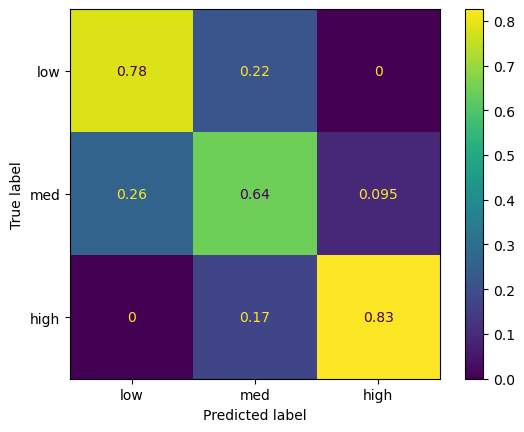

In [ ]:
# Plot confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn.predict(x_test)
display_labels = ["low", "med", "high"]
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, normalize="true", display_labels=display_labels
)
plt.show()

[codecarbon INFO @ 23:15:27] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:15:27] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:15:27] 0.000033 kWh of electricity used since the beginning.


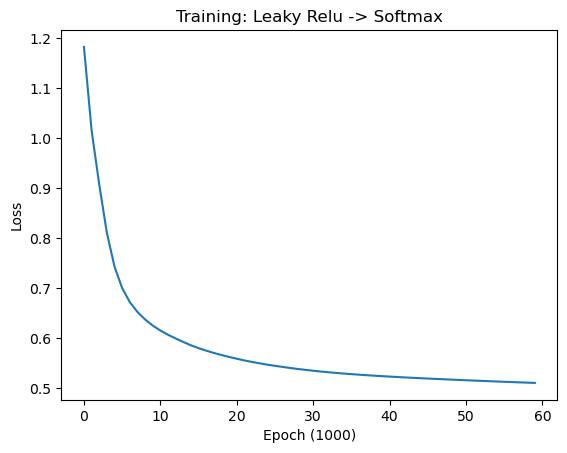

In [ ]:
# Plot training loss
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f"Training: {nn.neural_net_type}")
plt.xlabel("Epoch (1000)")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Total loss
y_hat = nn.forward(x_test, use_dropout=False)
print("Cross entropy loss:", round(nn.cross_entropy_loss(y_test, y_hat), 3))

Cross entropy loss: 0.752


## 1.3 Loss plot and CE value for NN with BGD [5pts Grad / 0.7% Bonus for Undergrad] <span style="color:green">**[W]**</span>

Train your neural network implementation with batch gradient descent and print out the loss at every 1000th iteration (starting at iteration 0). The following cells will plot the loss vs epoch graph and calculate the final test CE.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from NN import NeuralNet
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x_train, y_train, x_test, y_test = get_housing_dataset()

nn = NeuralNet(
    y_train, lr=0.01, use_dropout=True, use_momentum=False
)  # initalize neural net class
nn.batch_gradient_descent(x_train, y_train, iter=60000, use_momentum=False)

[codecarbon INFO @ 23:15:27] Energy consumed for RAM : 0.020783 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:15:27] Energy consumed for all CPUs : 0.034647 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:15:27] 0.055430 kWh of electricity used since the beginning.


Loss after iteration 0: 1.197570
Loss after iteration 1000: 1.051471
Loss after iteration 2000: 0.957014
Loss after iteration 3000: 0.875206
Loss after iteration 4000: 0.834786
Loss after iteration 5000: 0.699549
Loss after iteration 6000: 0.738263
Loss after iteration 7000: 0.828396
Loss after iteration 8000: 0.586868
Loss after iteration 9000: 0.649610
Loss after iteration 10000: 0.766905
Loss after iteration 11000: 0.578641
Loss after iteration 12000: 0.686734
Loss after iteration 13000: 0.774916
Loss after iteration 14000: 0.536919
Loss after iteration 15000: 0.633208
Loss after iteration 16000: 0.793212
Loss after iteration 17000: 0.566528
Loss after iteration 18000: 0.598155
Loss after iteration 19000: 0.715798
Loss after iteration 20000: 0.546427
Loss after iteration 21000: 0.511501
Loss after iteration 22000: 0.693354
Loss after iteration 23000: 0.511790
Loss after iteration 24000: 0.548698
Loss after iteration 25000: 0.718223
Loss after iteration 26000: 0.500106
Loss after ite

[codecarbon INFO @ 23:15:35] Energy consumed for RAM : 0.020100 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:15:35] Energy consumed for all CPUs : 0.033506 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:15:35] 0.053605 kWh of electricity used since the beginning.


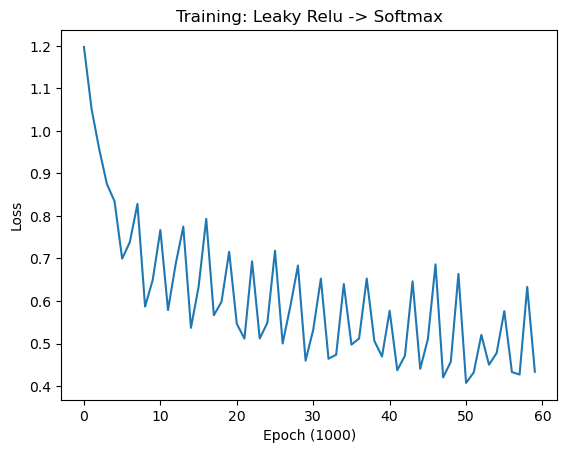

In [ ]:
# Plot training loss
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f"Training: {nn.neural_net_type}")
plt.xlabel("Epoch (1000)")
plt.ylabel("Loss")
plt.show()

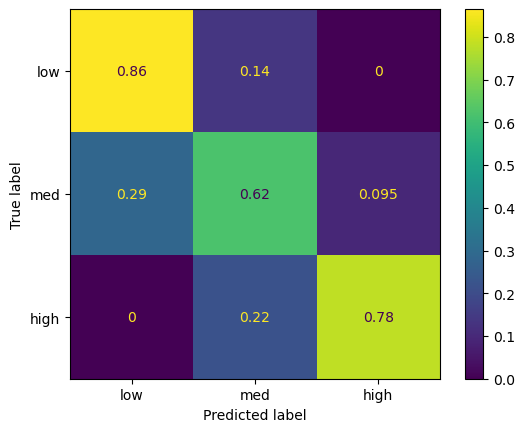

In [ ]:
# Plot confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn.predict(x_test)
display_labels = ["low", "med", "high"]
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, normalize="true", display_labels=display_labels
)
plt.show()

In [ ]:
# Total loss
y_hat = nn.forward(x_test, use_dropout=False)
print("Cross entropy loss:", round(nn.cross_entropy_loss(y_test, y_hat), 3))

Cross entropy loss: 0.701


## 1.4 Loss plot and CE value for NN with Gradient Descent with Momentum [5pts Grad / 0.6% Bonus for Undergrad] <span style="color:green">**[W]**</span>

Train your neural net implementation using gradient descent with momentum and print out the loss at every 1000th iteration (starting at iteration 0). The following cells will plot the loss vs epoch graph and calculate the final test CE.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from NN import NeuralNet
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x_train, y_train, x_test, y_test = get_housing_dataset()

nn = NeuralNet(
    y_train, lr=0.01, use_dropout=False, use_momentum=True
)  # initalize neural net class
nn.gradient_descent(x_train, y_train, iter=60000, use_momentum=True)  # train

Loss after iteration 0: 1.182135
Loss after iteration 1000: 0.907767
Loss after iteration 2000: 0.743341
Loss after iteration 3000: 0.672408
Loss after iteration 4000: 0.637699
Loss after iteration 5000: 0.615555
Loss after iteration 6000: 0.599761
Loss after iteration 7000: 0.586002
Loss after iteration 8000: 0.575381
Loss after iteration 9000: 0.566599
Loss after iteration 10000: 0.559197
Loss after iteration 11000: 0.552758
Loss after iteration 12000: 0.547389
Loss after iteration 13000: 0.542816
Loss after iteration 14000: 0.538727
Loss after iteration 15000: 0.535199
Loss after iteration 16000: 0.532172
Loss after iteration 17000: 0.529589
Loss after iteration 18000: 0.527325
Loss after iteration 19000: 0.525321
Loss after iteration 20000: 0.523505
Loss after iteration 21000: 0.521851
Loss after iteration 22000: 0.520319
Loss after iteration 23000: 0.518879
Loss after iteration 24000: 0.517514
Loss after iteration 25000: 0.516210
Loss after iteration 26000: 0.514958
Loss after ite

[codecarbon INFO @ 23:15:42] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:15:42] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:15:42] 0.000067 kWh of electricity used since the beginning.


Loss after iteration 31000: 0.509182
Loss after iteration 32000: 0.508079


[codecarbon INFO @ 23:15:42] Energy consumed for RAM : 0.020796 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:15:42] Energy consumed for all CPUs : 0.034668 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:15:42] 0.055464 kWh of electricity used since the beginning.


Loss after iteration 33000: 0.507030
Loss after iteration 34000: 0.506017
Loss after iteration 35000: 0.504997
Loss after iteration 36000: 0.503901
Loss after iteration 37000: 0.502812
Loss after iteration 38000: 0.501723
Loss after iteration 39000: 0.500717
Loss after iteration 40000: 0.499764
Loss after iteration 41000: 0.498824
Loss after iteration 42000: 0.497871
Loss after iteration 43000: 0.496955
Loss after iteration 44000: 0.496085
Loss after iteration 45000: 0.495230
Loss after iteration 46000: 0.494388
Loss after iteration 47000: 0.493488
Loss after iteration 48000: 0.492632
Loss after iteration 49000: 0.491844
Loss after iteration 50000: 0.491096
Loss after iteration 51000: 0.490364
Loss after iteration 52000: 0.489667
Loss after iteration 53000: 0.488946
Loss after iteration 54000: 0.488189
Loss after iteration 55000: 0.487491
Loss after iteration 56000: 0.486803
Loss after iteration 57000: 0.486133
Loss after iteration 58000: 0.485477
Loss after iteration 59000: 0.484780


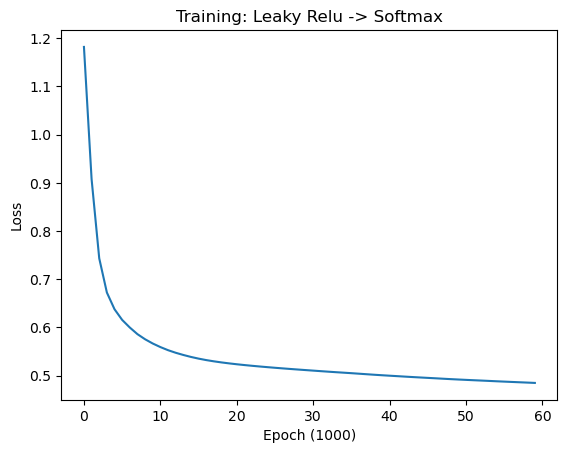

In [ ]:
# Plot training loss
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f"Training: {nn.neural_net_type}")
plt.xlabel("Epoch (1000)")
plt.ylabel("Loss")
plt.show()

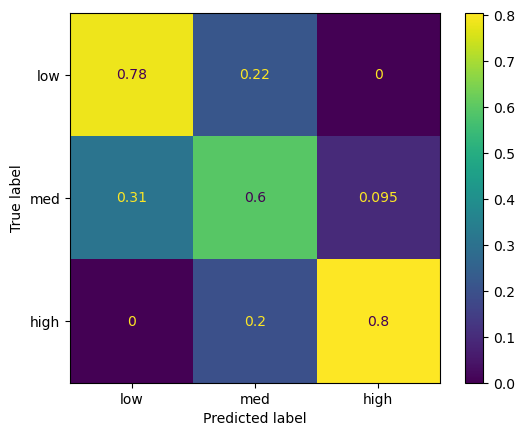

In [ ]:
# Plot confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred = nn.predict(x_test)
display_labels = ["low", "med", "high"]
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, normalize="true", display_labels=display_labels
)
plt.show()

In [ ]:
# Total loss
y_hat = nn.forward(x_test, use_dropout=False)
print("Cross entropy loss:", round(nn.cross_entropy_loss(y_test, y_hat), 3))

Cross entropy loss: 0.733


# 2: Image Classification based on Convolutional Neural Networks [25pts; 20pts Grad / 2.7% Bonus for Undergrad + 1.1% Bonus for all] <span style="color:blue">**[P]**</span><span style="color:green">**[W]**</span>


## 2.1 Image Classification using Pytorch and CNN

- [Pytorch](https://pytorch.org) is a popular platform for machine learning.

**Pytorch Description**

PyTorch is a Machine Learning/Deep Learning tensor library based on Python and Torch. It uses dynamic computation graphs and is completely Pythonic. Pytorch is used for applications using GPUs and CPUs.

**Helpful Links**

- [Install Pytorch](https://pytorch.org/get-started/locally/)
- [Pytorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)


**Setup Pytorch**

Make sure you installed pytorch and torchvision (directions [here](https://pytorch.org/get-started/locally/)).

Please also see [Pytorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) to see how to load a data set, build a training loop, and test the model. Another good resource for building CNNs using Pytorch is [here](https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/).


### Environment Setup


In [ ]:
import torch
import torchvision
from torch.utils.data import non_deterministic
from torchvision.transforms import v2

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

[codecarbon INFO @ 23:39:21] Energy consumed for RAM : 0.021287 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:39:21] Energy consumed for all CPUs : 0.035486 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:39:21] 0.056772 kWh of electricity used since the beginning.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2.1.1 Load FashionMNIST Dataset and Data Augmentation [5pts - Bonus for Undergrad]<span style="color:blue">**[P]**</span>


We use [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset to train our model. This is a dataset of 70,000 28x28 grayscale images in 10 classes. There are 60,000 training images and 10,000 test images. We provide code for you to download Fashion-MNIST dataset below.

#### Data Augmentation [5pts]

Data augmentation is a technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation and flipping the image around an axis. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately. We will preprocess the training and testing set, but only the training set will undergo augmentation.

Go through the [Pytorch torchvision.transforms.v2 documentation](https://pytorch.org/vision/master/transforms.html) to see how to apply multiple transformations at once.

In the <strong>cnn_image_transformations.py</strong> file, complete the following functions to understand the common practices used for preprocessing and augmenting the image data:

- <strong>create_training_transformations</strong>

  - In this function, you are going to preprocess and augment training data.

    - PREPROCESS: Convert the given PIL Images to Tensors

    - AUGMENTATION: Apply Random Horizontal Flip and Random Rotation

- <strong>create_testing_transformations</strong>

  - In this function, you are going to only preprocess testing data.

    - PREPROCESS: Convert the given PIL Images to Tensors

Please note that the Gradescope only checks if expected preprocessing layers are existent.

**References**

[v2.Compose()](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Compose.html)

[v2.ToTensor()](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToTensor.html) (Hint: Look at the warning)

[v2.RandomHorizontalFlip()](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html)

[v2.RandomApply()](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.RandomApply.html)

[v2.RandomRotation()](https://pytorch.org/vision/main/generated/torchvision.transforms.RandomRotation.html)

[Article about performance regarding transformations](https://pytorch.org/vision/master/transforms.html)


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from cnn_image_transformations import (
    create_testing_transformations,
    create_training_transformations,
)

# Create Transformations
training_transformations = create_training_transformations()
testing_transformation = create_testing_transformations()

# Load data
trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=training_transformations
)
testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=testing_transformation
)

classes = (
    "Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


### 2.1.2 Load some sample images from Fashion-MNIST [Setup - No points]


[codecarbon INFO @ 23:40:21] Energy consumed for RAM : 0.021337 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:40:21] Energy consumed for all CPUs : 0.035570 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:40:21] 0.056907 kWh of electricity used since the beginning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image size
[28, 28]


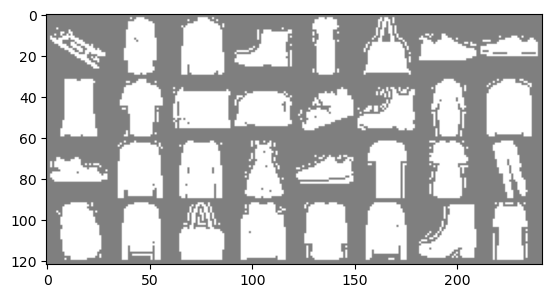

In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

import matplotlib.pyplot as plt
import numpy as np

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=32, shuffle=True, num_workers=2
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=32, shuffle=False, num_workers=2
)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print("Image size")
print(v2.functional.get_size(images[0]))

# show images
imshow(torchvision.utils.make_grid(images))

As you can see from above, the FashionMNIST dataset contains different types of objects. The images have been size-normalized and objects remain centered in fixed-size images.


### 2.1.3 Build convolutional neural network model [5pts Grad / 0.7% Bonus for Undergrad] <span style="color:green">**[W]**</span>


In this part, you need to build a convolutional neural network as described below. The architecture of the model is outlined.

In the <strong>cnn.py</strong> file, complete the following functions:

- <strong> \_\_init\_\_</strong>: See Defining Variables section
- <strong>forward</strong>: See Defining Model section

**[INPUT - CONV - CONV - MAXPOOL - DROPOUT - CONV - CONV - MAXPOOL - DROPOUT - AVERAGEPOOL - FC1 - DROPOUT - FC2 - DROPOUT - FC3]**

> INPUT: [$28\times28\times1$] will hold the raw pixel values of the image, in this case, an image of width 28, height 28. This layer should give 8 filters and have appropriate padding to maintain shape.

> CONV: Conv. layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to the input volume. In our example architecture, we decide to set the kernel_size to be $3\times3$. For example, the output of the Conv. layer may look like $[28\times28\times8]$ if we set out_channels to be 8 and use appropriate paddings to maintain shape.

> CONV: Additional Conv. layer take outputs from above layers and applies more filters. We set the kernel_size to be $3\times3$ and out_channels to be 32.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height). With pool size of $2\times2$, resulting shape takes form $16\times16$.

> DROPOUT: DROPOUT layer with the dropout rate of 0.2 to prevent overfitting.

> CONV: Additonal Conv. layer takes outputs from above layers and applies more filters. We set the kernel_size to be $3\times3$ and out_channels to be 32. Appropriate paddings are used to maintain shape.

> CONV: Additonal Conv. layer takes outputs from above layers and applies more filters. We set the kernel_size to be $3\times3$ and out_channels to be 64. Appropriate paddings are used to maintain shape.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, height).

> DROPOUT: Dropout layer with the dropout rate of 0.2 to prevent overfitting.

> AVERAGEPOOL: AVERAGEPOOL layer will perform a downsampling operation along the spatial dimension (width, height). Checkout AdaptiveAvgPool2d below.

> FC1: Dense layer which takes output from above layers, and has 256 neurons. Flatten() operations may be useful.

> DROPOUT: Dropout layer with the dropout rate of 0.2 to prevent overfitting.

> FC2： Dense layer which takes output from above layers, and has 128 neurons.

> DROPOUT: Dropout layer with the dropout rate of 0.2 to prevent overfitting.

> FC3: Dense layer with 10 neurons, and Softmax activation, is the final layer. The dimension of the output space is the number of classes.

**Activation function**: Use LeakyReLU with negative_slope 0.01 as the activation function for Conv. layers and Dense layers unless otherwise indicated to build you model architecture

Note that while this is a suggested model design, you may use other architectures and experiment with different layers for better results.

The following links are Pytorch documentation for the layers you are going to use to build the CNN.

- [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [Dense](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [MaxPool](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
- [AdaptiveAvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html)
- [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
- [LeakyReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html)
- [Flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html)

Lastly, if you would like to experiment with additional layers, explore the [torch.nn api](https://pytorch.org/docs/stable/nn.html).


[codecarbon INFO @ 23:40:28] Energy consumed for RAM : 0.022033 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:40:28] Energy consumed for all CPUs : 0.036731 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:40:28] 0.058764 kWh of electricity used since the beginning.


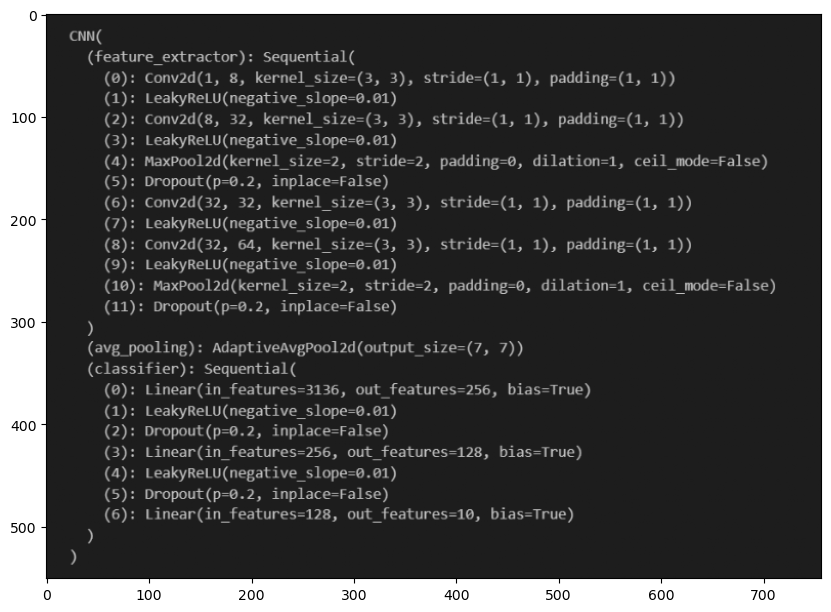

[codecarbon INFO @ 23:40:36] Energy consumed for RAM : 0.021350 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:40:36] Energy consumed for all CPUs : 0.035590 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:40:36] 0.056940 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:40:43] Energy consumed for RAM : 0.022046 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:40:43] Energy consumed for all CPUs : 0.036752 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:40:43] 0.058798 kWh of electricity used since the beginning.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# Show the architecture of the model
achi = plt.imread("./data/images/Architecture.png")
fig = plt.figure(figsize=(10, 10))
plt.imshow(achi)

#### Defining model [5pts Grad / 0.7% Bonus for Undergrad]<span style="color:green">**[W]**</span>


You now need to complete the `__init__()` function and the `forward()` function in <strong>cnn.py</strong> to define your model structure.

Your model is required to have at least 2 convolutional layers and at least 2 dense layers. Ensuring that these requirements are met will earn you 5pts.

Once you have defined a model structure you may use the cell below to examine your architecture.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# You can compare your architecture with the 'Architecture.png'

from cnn import CNN

net = CNN()
print(net)

CNN(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.2, inplace=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.01)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.2, inplace=False)
  )
  (avg_pooling): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=256, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.2,

### 2.1.4 Train the network [8pts Grad / 1% Bonus for Undergrad (3pts, 3pts, 2pts) Bonus for Undergrad] <span style="color:green">**[W]**</span>


**Tuning:** Training the network is the next thing to try. You can set the hyperparameters in the cell below. If your hyperparameters are set properly, you should see the loss of the validation set decreased and the value of accuracy increased. <strong>It may take more than 15 minutes to train your model. </strong>

- Recommended Batch Sizes fall in the range 32-512 (use powers of 2)

- Recommended Epoch Counts fall in the range 5-20

- Recommended Learning Rates fall in the range .0001-.01

**Expected Result:** You should be able to achieve more than $90\%$ accuracy on the test set to get full points. If you achieve accuracy between $75\%$ to $84\%$, you will only get 3 points. An accuracy between $84\%$ to $90\%$ will earn an additional 3pts.

Note: If you would like to automate the tuning process, you can use a nested for loop to search for the hyperparameter that achieves the accuracy. You could also look into [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for hyperparameter optimization.

- $75\%$ to $84\%$ earns 3pts
- $84\%$ to $90\%$ earns 3pts more (6pts total)
- $90\%$+ earns 2pts more (8pts total)


#### Train your own CNN model


In [ ]:
from cnn import CNN
from cnn_trainer import Trainer

net = CNN()

# TODO: Change hyperparameters here
num_epochs = 20
batch_size = 64
init_lr = 0.001

# Choose best device to speed up training
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print(f"Using {device} device")

trainer = Trainer(
    net,
    trainset,
    testset,
    num_epochs=num_epochs,
    batch_size=batch_size,
    init_lr=init_lr,
    device=device,
)
trainer.train()

Using mps device


[codecarbon INFO @ 00:00:24] Energy consumed for RAM : 0.166990 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:00:24] Energy consumed for all CPUs : 0.278375 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:00:24] 0.445365 kWh of electricity used since the beginning.
Epoch 1/20:   4%|▎         | 33/938 [00:07<00:51, 17.49batch/s, accuracy=0.333, loss=2.12]  [codecarbon INFO @ 00:00:32] Energy consumed for RAM : 0.166306 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:00:32] Energy consumed for all CPUs : 0.277233 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:00:32] 0.443540 kWh of electricity used since the beginning.
Epoch 1/20:  14%|█▍        | 136/938 [00:14<00:58, 13.70batch/s, accuracy=0.554, loss=1.91][codecarbon INFO @ 00:00:39] Energy consumed for RAM : 0.167002 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:00:39] Energy consumed for all CPUs : 0.278396 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:00:39] 0.445398 kWh of electricity used since the beginning.
Epoch 1/20:  

Epoch 1: Validation Loss: 1.64, Validation Accuracy: 0.820


Epoch 2/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:01:17] Energy consumed for RAM : 0.166344 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:01:17] Energy consumed for all CPUs : 0.277296 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:01:17] 0.443640 kWh of electricity used since the beginning.
Epoch 2/20:   8%|▊         | 78/938 [00:08<00:51, 16.60batch/s, accuracy=0.807, loss=1.65][codecarbon INFO @ 00:01:24] Energy consumed for RAM : 0.167040 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:01:24] Energy consumed for all CPUs : 0.278458 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:01:24] 0.445498 kWh of electricity used since the beginning.
Epoch 2/20:  22%|██▏       | 207/938 [00:16<00:41, 17.67batch/s, accuracy=0.808, loss=1.65][codecarbon INFO @ 00:01:32] Energy consumed for RAM : 0.166356 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:01:32] Energy consumed for all CPUs : 0.277317 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:01:32] 0.443673 kWh of

Epoch 2: Validation Loss: 1.62, Validation Accuracy: 0.842


Epoch 3/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:02:02] Energy consumed for RAM : 0.166381 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:02:02] Energy consumed for all CPUs : 0.277358 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:02:02] 0.443740 kWh of electricity used since the beginning.
Epoch 3/20:   7%|▋         | 67/938 [00:07<00:46, 18.80batch/s, accuracy=0.822, loss=1.64][codecarbon INFO @ 00:02:09] Energy consumed for RAM : 0.167077 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:02:09] Energy consumed for all CPUs : 0.278521 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:02:09] 0.445598 kWh of electricity used since the beginning.
Epoch 3/20:  22%|██▏       | 209/938 [00:15<00:35, 20.57batch/s, accuracy=0.829, loss=1.63][codecarbon INFO @ 00:02:17] Energy consumed for RAM : 0.166394 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:02:17] Energy consumed for all CPUs : 0.277379 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:02:17] 0.443773 kWh of

Epoch 3: Validation Loss: 1.60, Validation Accuracy: 0.858


Epoch 4/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:02:47] Energy consumed for RAM : 0.166419 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:02:47] Energy consumed for all CPUs : 0.277421 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:02:47] 0.443840 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:02:47] 0.001009 g.CO2eq/s mean an estimation of 31.826527940982473 kg.CO2eq/year
Epoch 4/20:  11%|█         | 101/938 [00:09<01:01, 13.71batch/s, accuracy=0.844, loss=1.62][codecarbon INFO @ 00:02:54] Energy consumed for RAM : 0.167115 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:02:54] Energy consumed for all CPUs : 0.278583 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:02:54] 0.445698 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:02:54] 0.001010 g.CO2eq/s mean an estimation of 31.83613019708338 kg.CO2eq/year
Epoch 4/20:  27%|██▋       | 250/938 [00:17<00:35, 19.57batch/s, accuracy=0.848, loss=1.61][codecarbon INFO @ 00:0

Epoch 4: Validation Loss: 1.59, Validation Accuracy: 0.870


Epoch 5/20:   1%|          | 11/938 [00:03<02:30,  6.17batch/s, accuracy=0.865, loss=1.6][codecarbon INFO @ 00:03:32] Energy consumed for RAM : 0.166456 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:03:32] Energy consumed for all CPUs : 0.277484 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:03:32] 0.443940 kWh of electricity used since the beginning.
Epoch 5/20:  13%|█▎        | 124/938 [00:10<00:42, 19.36batch/s, accuracy=0.857, loss=1.6] [codecarbon INFO @ 00:03:39] Energy consumed for RAM : 0.167152 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:03:39] Energy consumed for all CPUs : 0.278646 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:03:39] 0.445798 kWh of electricity used since the beginning.
Epoch 5/20:  33%|███▎      | 314/938 [00:18<00:19, 31.43batch/s, accuracy=0.856, loss=1.6][codecarbon INFO @ 00:03:47] Energy consumed for all CPUs : 0.277504 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:03:47] 0.443973 kWh of electricity used since the beginning.
Epoch 5/20:  

Epoch 5: Validation Loss: 1.58, Validation Accuracy: 0.877


Epoch 6/20:  18%|█▊        | 169/938 [00:13<00:34, 22.03batch/s, accuracy=0.865, loss=1.6] [codecarbon INFO @ 00:04:24] Energy consumed for RAM : 0.167190 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:04:24] Energy consumed for all CPUs : 0.278708 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:04:24] 0.445898 kWh of electricity used since the beginning.
Epoch 6/20:  42%|████▏     | 390/938 [00:20<00:16, 33.35batch/s, accuracy=0.864, loss=1.6] [codecarbon INFO @ 00:04:32] Energy consumed for RAM : 0.166506 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:04:32] Energy consumed for all CPUs : 0.277567 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:04:32] 0.444073 kWh of electricity used since the beginning.
Epoch 6/20:  66%|██████▌   | 621/938 [00:28<00:09, 34.38batch/s, accuracy=0.866, loss=1.6][codecarbon INFO @ 00:04:39] Energy consumed for RAM : 0.167202 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:04:39] Energy consumed for all CPUs : 0.278729 kWh. Total CPU Power : 5.0 W
[codeca

Epoch 6: Validation Loss: 1.58, Validation Accuracy: 0.885


Epoch 7/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:04:54] Energy consumed for RAM : 0.167215 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:04:54] Energy consumed for all CPUs : 0.278750 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:04:54] 0.445965 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:04:54] 0.001010 g.CO2eq/s mean an estimation of 31.8393290143635 kg.CO2eq/year
Epoch 7/20:   9%|▉         | 87/938 [00:08<00:51, 16.49batch/s, accuracy=0.876, loss=1.59][codecarbon INFO @ 00:05:02] Energy consumed for RAM : 0.166531 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:05:02] Energy consumed for all CPUs : 0.277609 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:05:02] 0.444140 kWh of electricity used since the beginning.
Epoch 7/20:  23%|██▎       | 215/938 [00:15<00:31, 22.68batch/s, accuracy=0.873, loss=1.59][codecarbon INFO @ 00:05:09] Energy consumed for RAM : 0.167227 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:05:09] Energy consu

Epoch 7: Validation Loss: 1.57, Validation Accuracy: 0.886


Epoch 8/20:   1%|▏         | 14/938 [00:03<01:43,  8.93batch/s, accuracy=0.874, loss=1.59][codecarbon INFO @ 00:05:39] Energy consumed for RAM : 0.167252 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:05:39] Energy consumed for all CPUs : 0.278813 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:05:39] 0.446065 kWh of electricity used since the beginning.
Epoch 8/20:  15%|█▌        | 142/938 [00:11<00:39, 20.00batch/s, accuracy=0.871, loss=1.59][codecarbon INFO @ 00:05:47] Energy consumed for all CPUs : 0.277671 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:05:47] 0.444240 kWh of electricity used since the beginning.
Epoch 8/20:  34%|███▍      | 318/938 [00:18<00:18, 33.42batch/s, accuracy=0.873, loss=1.59][codecarbon INFO @ 00:05:54] Energy consumed for RAM : 0.167265 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:05:54] Energy consumed for all CPUs : 0.278833 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:05:54] 0.446098 kWh of electricity used since the beginning.
Epoch 8/20:

Epoch 8: Validation Loss: 1.57, Validation Accuracy: 0.893


Epoch 9/20:   3%|▎         | 32/938 [00:05<00:53, 16.89batch/s, accuracy=0.893, loss=1.57][codecarbon INFO @ 00:06:24] Energy consumed for RAM : 0.167290 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:06:24] Energy consumed for all CPUs : 0.278875 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:06:24] 0.446165 kWh of electricity used since the beginning.
Epoch 9/20:  19%|█▊        | 174/938 [00:13<00:35, 21.49batch/s, accuracy=0.886, loss=1.57][codecarbon INFO @ 00:06:32] Energy consumed for RAM : 0.166606 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:06:32] Energy consumed for all CPUs : 0.277734 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:06:32] 0.444340 kWh of electricity used since the beginning.
Epoch 9/20:  39%|███▉      | 370/938 [00:20<00:17, 33.22batch/s, accuracy=0.88, loss=1.58] [codecarbon INFO @ 00:06:39] Energy consumed for RAM : 0.167302 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:06:39] Energy consumed for all CPUs : 0.278896 kWh. Total CPU Power : 5.0 W
[codeca

Epoch 9: Validation Loss: 1.57, Validation Accuracy: 0.895


Epoch 10/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:07:02] Energy consumed for RAM : 0.166631 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:07:02] Energy consumed for all CPUs : 0.277775 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:07:02] 0.444407 kWh of electricity used since the beginning.
Epoch 10/20:   4%|▍         | 41/938 [00:07<01:14, 12.00batch/s, accuracy=0.877, loss=1.58][codecarbon INFO @ 00:07:09] Energy consumed for RAM : 0.167327 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:07:09] Energy consumed for all CPUs : 0.278938 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:07:09] 0.446265 kWh of electricity used since the beginning.
Epoch 10/20:  18%|█▊        | 168/938 [00:15<00:46, 16.55batch/s, accuracy=0.883, loss=1.58][codecarbon INFO @ 00:07:17] Energy consumed for RAM : 0.166644 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:07:17] Energy consumed for all CPUs : 0.277796 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:07:17] 0.444440 kWh

Epoch 10: Validation Loss: 1.56, Validation Accuracy: 0.899


Epoch 11/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:07:47] Energy consumed for RAM : 0.166669 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:07:47] Energy consumed for all CPUs : 0.277838 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:07:47] 0.444507 kWh of electricity used since the beginning.
Epoch 11/20:   8%|▊         | 79/938 [00:07<00:46, 18.43batch/s, accuracy=0.883, loss=1.58][codecarbon INFO @ 00:07:54] Energy consumed for RAM : 0.167365 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:07:54] Energy consumed for all CPUs : 0.279000 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:07:54] 0.446365 kWh of electricity used since the beginning.
Epoch 11/20:  23%|██▎       | 219/938 [00:15<00:30, 23.59batch/s, accuracy=0.88, loss=1.58] [codecarbon INFO @ 00:08:02] Energy consumed for RAM : 0.166681 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:08:02] Energy consumed for all CPUs : 0.277859 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:08:02] 0.444540 kWh

Epoch 11: Validation Loss: 1.56, Validation Accuracy: 0.898


Epoch 12/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:08:32] Energy consumed for RAM : 0.166706 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:08:32] Energy consumed for all CPUs : 0.277900 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:08:32] 0.444607 kWh of electricity used since the beginning.
Epoch 12/20:   9%|▉         | 83/938 [00:09<00:47, 17.83batch/s, accuracy=0.89, loss=1.57] [codecarbon INFO @ 00:08:39] Energy consumed for RAM : 0.167402 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:08:39] Energy consumed for all CPUs : 0.279063 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:08:39] 0.446465 kWh of electricity used since the beginning.
Epoch 12/20:  24%|██▎       | 222/938 [00:17<00:34, 20.65batch/s, accuracy=0.888, loss=1.57][codecarbon INFO @ 00:08:47] Energy consumed for RAM : 0.166719 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:08:47] Energy consumed for all CPUs : 0.277921 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:08:47] 0.444640 kWh

Epoch 12: Validation Loss: 1.56, Validation Accuracy: 0.903


Epoch 13/20:   0%|          | 0/938 [00:00<?, ?batch/s][codecarbon INFO @ 00:09:17] Energy consumed for RAM : 0.166744 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:09:17] Energy consumed for all CPUs : 0.277963 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:09:17] 0.444707 kWh of electricity used since the beginning.
Epoch 13/20:  11%|█         | 99/938 [00:09<00:45, 18.41batch/s, accuracy=0.889, loss=1.57][codecarbon INFO @ 00:09:24] Energy consumed for RAM : 0.167440 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:09:24] Energy consumed for all CPUs : 0.279125 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:09:24] 0.446565 kWh of electricity used since the beginning.
Epoch 13/20:  29%|██▉       | 273/938 [00:16<00:20, 32.81batch/s, accuracy=0.89, loss=1.57] [codecarbon INFO @ 00:09:32] Energy consumed for RAM : 0.166756 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:09:32] Energy consumed for all CPUs : 0.277984 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:09:32] 0.444740 kWh

Epoch 13: Validation Loss: 1.56, Validation Accuracy: 0.902


Epoch 14/20:   1%|▏         | 14/938 [00:04<01:56,  7.91batch/s, accuracy=0.897, loss=1.56][codecarbon INFO @ 00:10:02] Energy consumed for RAM : 0.166781 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:10:02] Energy consumed for all CPUs : 0.278025 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:10:02] 0.444807 kWh of electricity used since the beginning.
Epoch 14/20:  15%|█▍        | 139/938 [00:11<00:48, 16.36batch/s, accuracy=0.894, loss=1.57][codecarbon INFO @ 00:10:09] Energy consumed for RAM : 0.167477 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:10:09] Energy consumed for all CPUs : 0.279188 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:10:09] 0.446665 kWh of electricity used since the beginning.
Epoch 14/20:  36%|███▌      | 337/938 [00:19<00:18, 32.47batch/s, accuracy=0.895, loss=1.57][codecarbon INFO @ 00:10:17] Energy consumed for RAM : 0.166794 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:10:17] Energy consumed for all CPUs : 0.278046 kWh. Total CPU Power : 5.0 W
[cod

Epoch 14: Validation Loss: 1.56, Validation Accuracy: 0.900


Epoch 15/20:   7%|▋         | 68/938 [00:07<00:48, 17.79batch/s, accuracy=0.898, loss=1.56][codecarbon INFO @ 00:10:47] Energy consumed for RAM : 0.166819 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:10:47] Energy consumed for all CPUs : 0.278088 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:10:47] 0.444907 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:10:47] 0.001010 g.CO2eq/s mean an estimation of 31.837432306040448 kg.CO2eq/year
Epoch 15/20:  21%|██        | 198/938 [00:14<00:30, 23.89batch/s, accuracy=0.897, loss=1.56][codecarbon INFO @ 00:10:54] Energy consumed for RAM : 0.167515 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:10:54] Energy consumed for all CPUs : 0.279250 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:10:54] 0.446765 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:10:54] 0.001010 g.CO2eq/s mean an estimation of 31.837215472974087 kg.CO2eq/year
Epoch 15/20:  41%|████      | 385/938 [00:21<00:28, 19.59batch/s, accuracy=

Epoch 15: Validation Loss: 1.56, Validation Accuracy: 0.905


Epoch 16/20:   8%|▊         | 74/938 [00:04<00:43, 19.70batch/s, accuracy=0.892, loss=1.57][codecarbon INFO @ 00:11:32] Energy consumed for RAM : 0.166856 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:11:32] Energy consumed for all CPUs : 0.278150 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:11:32] 0.445007 kWh of electricity used since the beginning.
Epoch 16/20:  21%|██        | 197/938 [00:11<00:31, 23.27batch/s, accuracy=0.896, loss=1.57][codecarbon INFO @ 00:11:40] Energy consumed for RAM : 0.167552 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:11:40] Energy consumed for all CPUs : 0.279313 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:11:40] 0.446865 kWh of electricity used since the beginning.
Epoch 16/20:  47%|████▋     | 437/938 [00:19<00:13, 37.85batch/s, accuracy=0.896, loss=1.57][codecarbon INFO @ 00:11:47] Energy consumed for RAM : 0.166869 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:11:47] Energy consumed for all CPUs : 0.278171 kWh. Total CPU Power : 5.0 W
[cod

Epoch 16: Validation Loss: 1.56, Validation Accuracy: 0.905


Epoch 17/20:   4%|▍         | 36/938 [00:03<00:53, 16.84batch/s, accuracy=0.905, loss=1.56][codecarbon INFO @ 00:12:10] Energy consumed for RAM : 0.167577 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:12:10] Energy consumed for all CPUs : 0.279354 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:12:10] 0.446932 kWh of electricity used since the beginning.
Epoch 17/20:  27%|██▋       | 252/938 [00:11<00:29, 23.10batch/s, accuracy=0.895, loss=1.57][codecarbon INFO @ 00:12:17] Energy consumed for RAM : 0.166894 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:12:17] Energy consumed for all CPUs : 0.278213 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:12:17] 0.445107 kWh of electricity used since the beginning.
Epoch 17/20:  51%|█████     | 480/938 [00:18<00:13, 34.90batch/s, accuracy=0.895, loss=1.57][codecarbon INFO @ 00:12:25] Energy consumed for RAM : 0.167590 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:12:25] Energy consumed for all CPUs : 0.279375 kWh. Total CPU Power : 5.0 W
[cod

Epoch 17: Validation Loss: 1.55, Validation Accuracy: 0.907


Epoch 18/20:   8%|▊         | 71/938 [00:05<00:48, 17.98batch/s, accuracy=0.901, loss=1.56][codecarbon INFO @ 00:12:47] Energy consumed for RAM : 0.166919 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:12:47] Energy consumed for all CPUs : 0.278255 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:12:47] 0.445173 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:12:48] 0.001009 g.CO2eq/s mean an estimation of 31.828066994994956 kg.CO2eq/year
Epoch 18/20:  23%|██▎       | 213/938 [00:12<00:24, 29.75batch/s, accuracy=0.899, loss=1.56][codecarbon INFO @ 00:12:55] Energy consumed for RAM : 0.167615 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:12:55] Energy consumed for all CPUs : 0.279417 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:12:55] 0.447032 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:12:55] 0.001010 g.CO2eq/s mean an estimation of 31.83857884316832 kg.CO2eq/year
Epoch 18/20:  49%|████▊     | 456/938 [00:20<00:13, 36.71batch/s, accuracy=0

Epoch 18: Validation Loss: 1.55, Validation Accuracy: 0.908


Epoch 19/20:   7%|▋         | 70/938 [00:04<00:40, 21.30batch/s, accuracy=0.892, loss=1.57][codecarbon INFO @ 00:13:25] Energy consumed for RAM : 0.167640 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:13:25] Energy consumed for all CPUs : 0.279459 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:13:25] 0.447098 kWh of electricity used since the beginning.
Epoch 19/20:  24%|██▍       | 225/938 [00:12<00:32, 21.90batch/s, accuracy=0.896, loss=1.56][codecarbon INFO @ 00:13:32] Energy consumed for RAM : 0.166956 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:13:32] Energy consumed for all CPUs : 0.278317 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:13:32] 0.445273 kWh of electricity used since the beginning.
Epoch 19/20:  43%|████▎     | 402/938 [00:19<00:13, 40.67batch/s, accuracy=0.898, loss=1.56][codecarbon INFO @ 00:13:40] Energy consumed for RAM : 0.167652 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:13:40] Energy consumed for all CPUs : 0.279479 kWh. Total CPU Power : 5.0 W
[cod

Epoch 19: Validation Loss: 1.55, Validation Accuracy: 0.908


Epoch 20/20:   5%|▌         | 49/938 [00:04<00:53, 16.73batch/s, accuracy=0.908, loss=1.55][codecarbon INFO @ 00:14:02] Energy consumed for RAM : 0.166981 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:14:02] Energy consumed for all CPUs : 0.278359 kWh. Total CPU Power : 5.0 W
Epoch 20/20:  19%|█▉        | 179/938 [00:11<00:40, 18.83batch/s, accuracy=0.902, loss=1.56][codecarbon INFO @ 00:14:10] Energy consumed for RAM : 0.167677 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:14:10] Energy consumed for all CPUs : 0.279521 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:14:10] 0.447198 kWh of electricity used since the beginning.
Epoch 20/20:  46%|████▌     | 427/938 [00:19<00:15, 34.04batch/s, accuracy=0.902, loss=1.56][codecarbon INFO @ 00:14:17] Energy consumed for RAM : 0.166994 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:14:17] Energy consumed for all CPUs : 0.278380 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:14:17] 0.445373 kWh of electricity used since the beginning.
Epoc

Epoch 20: Validation Loss: 1.55, Validation Accuracy: 0.907


[codecarbon INFO @ 00:14:40] Energy consumed for RAM : 0.167702 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:14:40] Energy consumed for all CPUs : 0.279563 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:14:40] 0.447265 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:14:48] Energy consumed for RAM : 0.167019 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:14:48] Energy consumed for all CPUs : 0.278421 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:14:48] 0.445440 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:14:48] 0.001009 g.CO2eq/s mean an estimation of 31.834972081924963 kg.CO2eq/year
[codecarbon INFO @ 00:14:55] Energy consumed for RAM : 0.167715 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:14:55] Energy consumed for all CPUs : 0.279584 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:14:55] 0.447298 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:14:55] 0.001010 g.CO2eq/s mean an estimation of 31.837143039726598 kg.C

### 2.1.5 Examine accuracy and loss [2pts Grad / 0.3% Bonus for Undergrad] <span style="color:green">**[W]**</span>


You should expect to see gradually decreasing loss and gradually increasing accuracy. Examine loss and accuracy by running the cell below, no editing is necessary. Having appropriate looking loss and accuracy plots will earn you the last 2pts for your convolutional neural net.


[codecarbon INFO @ 00:18:03] Energy consumed for RAM : 0.167181 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:18:03] Energy consumed for all CPUs : 0.278692 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:18:03] 0.445874 kWh of electricity used since the beginning.


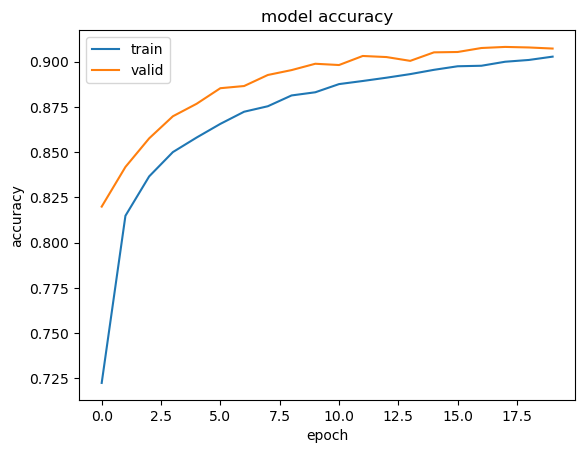

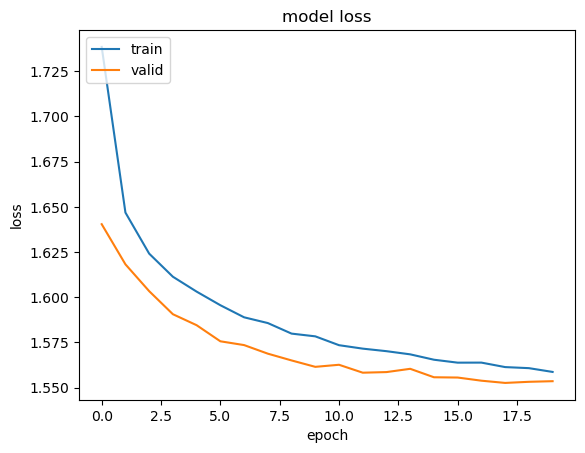

[codecarbon INFO @ 00:18:10] Energy consumed for RAM : 0.167877 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:18:10] Energy consumed for all CPUs : 0.279855 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:18:10] 0.447732 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:18:18] Energy consumed for RAM : 0.167194 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:18:18] Energy consumed for all CPUs : 0.278713 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:18:18] 0.445907 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:18:25] Energy consumed for RAM : 0.167890 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:18:25] Energy consumed for all CPUs : 0.279875 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:18:25] 0.447765 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:18:33] Energy consumed for RAM : 0.167206 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:18:33] Energy consumed for all CPUs : 0.278734 kWh. Total CPU Power : 5.0 W
[codecarbon

In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# list all data in history
train_loss, train_accuracy, valid_loss, valid_accuracy = trainer.get_training_history()

# summarize history for accuracy and loss
plt.plot(train_accuracy)
plt.plot(valid_accuracy)
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "valid"], loc="upper left")
plt.show()

plt.plot(train_loss)
plt.plot(valid_loss)
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "valid"], loc="upper left")
plt.show()

[codecarbon INFO @ 23:22:20] Energy consumed for RAM : 0.020437 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:22:20] Energy consumed for all CPUs : 0.034068 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:22:20] 0.054505 kWh of electricity used since the beginning.


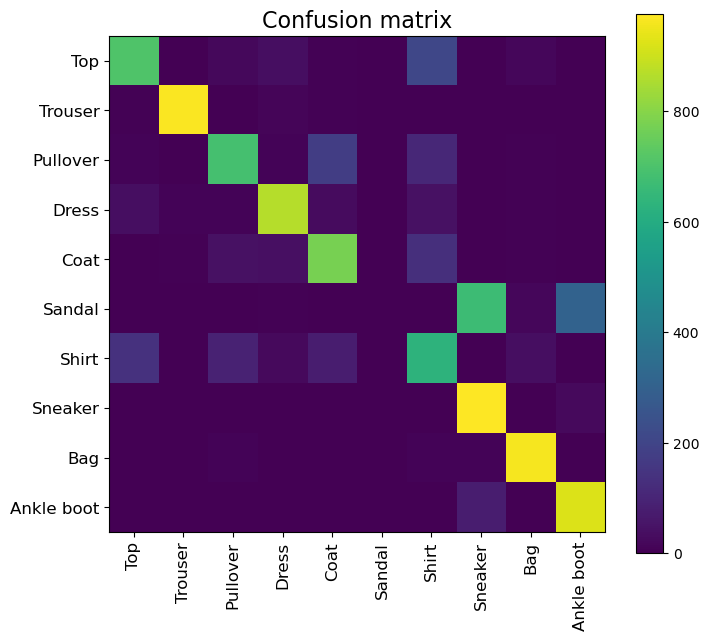

In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

# make predictions
y_pred, y_pred_classes, y_gt_classes = trainer.predict(testloader)
y_pred_prob = torch.max(y_pred, dim=1).values

from sklearn.metrics import accuracy_score, confusion_matrix

plt.figure(figsize=(8, 7))
plt.imshow(confusion_matrix(y_gt_classes, y_pred_classes))
plt.title("Confusion matrix", fontsize=16)
plt.xticks(np.arange(10), classes, rotation=90, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

## 2.2 Exploring Deep CNN Architectures [1.1% Bonus for All] <span style="color:green">**[W]**</span>


The network you have produced is rather simple relative to many of those used in industry and research. Researchers have worked to make CNN models deeper and deeper over the past years in an effort to gain higher accuracy in predictions. While your model is only a handful of layers deep, some state of the art deep architectures may include up to 150 layers. However, this process has not been without challenges.

One such problem is the problem of the vanishing gradient. The weights of a neural network are updated using the backpropagation algorithm. The backpropagation algorithm makes a small change to each weight in such a way that the loss of the model decreases. Using the chain rule, we can find this gradient for each weight. But, as this gradient keeps flowing backwards to the initial layers, this value keeps getting multiplied by each local gradient. Hence, the gradient becomes smaller and smaller, making the updates to the initial layers very small, increasing the training time considerably and increasing the risk of numerical instability.

Many tactics have been used in an effort to solve this problem. One architecture, named ResNet, solves the vanishing gradient problem in a unique way. ResNet was developed at Microsoft Research to find better ways to train deep networks. Take a moment to explore how ResNet tackles the vanishing gradient problem by reading the original research paper here: https://arxiv.org/pdf/1512.03385.pdf (also included as PDF in papers directory).


**Question:** In your own words, explain how ResNet addresses the vanishing gradient problem in 1-2 sentences below: (Please type answers directly in the cell below.)


ResNet addresses the vanishing gradient problem by residual connections, which allow gradients to bypass one+ layers, enabling the network to learn identity mappings and ensuring that gradients can flow more easily through the network during backpropagation.
This helps maintain stronger gradients and facilitates the training of much deeper networks.

# 3: Random Forests [45pts; 40pts + 1.1% Bonus for All] <span style="color:blue">**[P]**</span> <span style="color:green">**[W]**</span>

**NOTE**: Please use sklearn's ExtraTreeClassifier in your Random Forest implementation. [You can find more details about this classifier here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html)

For context, the general difference between an extra tree and decision tree classifier is that the decision tree optimizes which feature to reduce entropy on and at what value to split, while an extra tree randomly splits on the features given.


## 3.1 Random Forest Implementation [35pts] <span style="color:blue">**[P]**</span>

The decision boundaries drawn by decision or extra trees are very sharp, and fitting a tree of unbounded depth to a list of examples almost inevitably leads to **overfitting**. In an attempt to decrease the variance of an extra tree, we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging'). This stems from the idea that a collection of weak learners can learn decision boundaries as well as a strong learner. This is commonly called a Random Forest.

We can build a Random Forest as a collection of extra trees, as follows:

1. For every tree in the random forest, we're going to

   a) Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset.

   b) From the subsamples in part a, choose attributes at random without replacement to learn on in accordance with a provided attribute subsampling rate. Based on what it was mentioned in the class, we randomly pick features in each split. We use a more general approach here to make the programming part easier. Let's randomly pick some features (65% percent of features) and grow the tree based on the pre-determined randomly selected features. Therefore, there is no need to find random features in each split.

   c) Fit an extra tree to the subsample of data we've chosen to a certain depth.

You can refresh your understanding with the [lecture notes](https://mahdi-roozbahani.github.io/CS46417641-summer2024/course/21-ensemble-learning-randomforest.pdf).

Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In the <strong>random_forest.py</strong> file, complete the following functions:

- <strong>\_bootstrapping</strong>: this function will be used in `bootstrapping()`
- <strong>fit</strong>: Fit the extra trees initialized in `__init__` with the datasets created in `bootstrapping()`. You will need to call `bootstrapping()`.

**NOTES:**

1. In the Random Forest Class, X is assumed to be a matrix with num_training rows and num_features columns where num_training is the number of total records and num_features is the number of features of each record. y is assumed to be a vector of labels of length num_training.
2. Look out for TODO's for the parts that need to be implemented
3. If you receive any `SettingWithCopyWarning` warnings from the Pandas library, you can safely ignore them.
4. Hint: when bootstrapping, set replace = False while creating col_idx


## 3.2 Hyperparameter Tuning with a Random Forest [5pts] <span style="color:blue">**[P]**</span>

In machine learning, hyperparameters are parameters that are set before the learning process begins. The max_depth, num_estimators, or max_features variables from 3.1 are examples of different hyperparameters for a random forest model. Let's first review the dataset in a bit more detail.

#### Dataset Objective

Imagine that we are a team of researchers working to track and document various information related to dry beans for a machine learning model that predicts what type of bean is represented. We know that there are multiple things to keep track of, such as the shapes and sizes that differentiate different types of beans. We will use the information we track and document in order to publish it for the general public.

After much reflection within the research team, we come to the conclusion that we can use past observations on bean images to create a model.

We will use our random forest algorithm from Q3.1 to predict the bean type.

You can find more information on the dataset [here](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset).


_The barbunya bean, also known as the cranberry bean, was first bred in Colombia._

![A barbunya bean](data/images/barbunya.jpg)


#### Loading the dataset

The dataset that the company has collected has the following features:

There were 16 features used in this dataset.

Inputs:

1. Area: The area of a bean zone and the number of pixels within its boundaries
2. Perimeter: Bean circumference is defined as the length of its border
3. MajorAxisLength: The distance between the ends of the longest line that can be drawn from a bean
4. MinorAxisLength: The longest line that can be drawn from the bean while standing perpendicular to the main axis
5. AspectRatio: Defines the relationship between MajorAxisLength and MinorAxisLength
6. Eccentricity: Eccentricity of the ellipse having the same moments as the region
7. ConvexArea: Number of pixels in the smallest convex polygon that can contain the area of a bean seed
8. EquivDiameter Equivalent diameter, the diameter of a circle having the same area as a bean seed area
9. Extent Feature: The ratio of the pixels in the bounding box to the bean area
10. Solidity: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness: Calculated with the following formula: (4piA)/(P^2)
12. Compactness: Measures the roundness of an object
13. ShapeFactor1
14. ShapeFactor2
15. ShapeFactor3
16. ShapeFactor4

Output:

17. Target value:
    - Seker
    - Barbunya
    - Bombay
    - Cali
    - Dermosan
    - Horoz
    - Sira

Your random forest model will try to predict this variable.


In [ ]:
import numpy as np
import pandas as pd

###############################
### DO NOT CHANGE THIS CELL ###
###############################
from sklearn import preprocessing

dry_bean_dataset = "./data/Dry_Bean_Dataset.csv"
df = pd.read_csv(dry_bean_dataset)

label_encoder = preprocessing.LabelEncoder()

X = df.drop(["Class"], axis=1)
y = label_encoder.fit_transform(df["Class"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_test = np.array(X_test)
X_train, y_train, X_test, y_test = (
    np.array(X_train),
    np.array(y_train),
    np.array(X_test),
    np.array(y_test),
)

In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
assert X_train.shape == (9119, 16)
assert y_train.shape == (9119,)
assert X_test.shape == (4492, 16)
assert y_test.shape == (4492,)

(9119, 16) (9119,) (4492, 16) (4492,)


In the following codeblock, train your random forest model with different values for max_depth, n_estimators, or max_features and evaluate each model on the held-out test set. Try to choose a combination of hyperparameters that maximizes your prediction accuracy on the test set (aim for 85%+).

In **random_forest.py**, once you are satisfied with your chosen parameters, update the following function:

- **select_hyperparameters**: change the values for `max_depth`, `n_estimators`, and `max_features`to your chosen values

Submit this file to Gradescope. You must achieve at least a **85% accuracy** against the test set in Gradescope to receive full credit for this section.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from utilities.localtests import TestRandomForest

"""
Once you have implemented Random forest, you can run this cell. If you implemented _bootStrapping correctly,
then this cell should execute without any errors.
"""
TestRandomForest("test_bootstrapping").test_bootstrapping()

test_bootstrapping passed!


In [ ]:
"""
TODO:
n_estimators defines how many Extra trees are fitted for the random forest.
max_depth defines a stop condition when the tree reaches to a certain depth.
max_features controls the percentage of features that are used to fit each extra tree.

Tune these three parameters to achieve a better accuracy. n_estimators and max_depth must both
be at least 3 in value for moderately reliable answers. While you can use the provided test set
to evaluate your implementation, you will need to obtain 85% on the test set to receive full
credit for this section.
"""

import sklearn.ensemble
from random_forest import RandomForest
from sklearn import preprocessing

################# DO NOT CHANGE THIS RANDOM SEED ####################
student_random_seed = 4641 + 7641
#####################################################################

################# CHANGE THESE VALUES ###############################
### Default Student Values
n_estimators = 11  # Hint: Consider values between 3-15.
max_depth = 15  # Hint: Consider values betweeen 3-15.
max_features = 1.0  # Hint: Consider values betweeen 0.3-1.0.

#####################################################################
random_forest = RandomForest(
    n_estimators, max_depth, max_features, random_seed=student_random_seed
)
random_forest.fit(X_train, y_train)
accuracy = random_forest.OOB_score(X_test, y_test)
print("accuracy: %.4f" % accuracy)

accuracy: 0.8713


**DON'T FORGET**: Once you are satisfied with your chosen parameters, change the values for `max_depth`, `n_estimators`, and `max_features` in the `select_hyperparameters()` function of your RandomForest class in `random_forest.py` to your chosen values, and then submit this file to Gradescope. You must achieve at least a **85% accuracy** against the test set in Gradescope to receive full credit for this section.


Below is a code block that plots a confusion matrix for the classifier's predictions on the test set. A few things to think about: What are some trends seen in the matrix? Why do they happen?


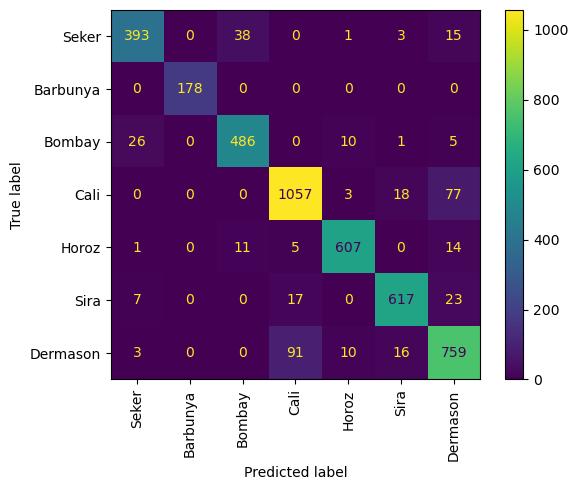

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

pred = random_forest.predict(X_test)
labels = ["Seker", "Barbunya", "Bombay", "Cali", "Horoz", "Sira", "Dermason"]
ConfusionMatrixDisplay.from_predictions(
    y_test, pred, display_labels=labels, xticks_rotation="vertical"
)
plt.show()

## 3.3 Plotting Feature Importance [1.1% Bonus for All] <span style="color:green">**[W]**</span>

While building tree-based models, it's common to quantify how well splitting on a particular feature in an extra tree helps with predicting the target label in a dataset. Machine learning practitioners typically use "Gini importance", or the (normalized) total reduction in entropy brought by that feature to evaluate how important that feature is for predicting the target variable.

Gini importance is typically calculated as the reduction in entropy from reaching a split in an extra tree weighted by the probability of reaching that split in the extra tree. Sklearn internally computes the probability for reaching a split by finding the total number of samples that reaches it during the training phase divided by the total number of samples in the dataset. This weighted value is our feature importance.

Let's think about what this metric means with an example. A high probability of reaching a split on feature A in an extra tree trained on a dataset (many samples will reach this split for a decision) and a large reduction in entropy from splitting on feature A will result in a high feature importance value for feature A. This could mean feature A is a very important feature for predicting the probability of the target label. On the other hand, a low probability of reaching a split on feature B in an extra tree and a low reduction in entropy from splitting on feature B will result in a low feature importance value. This could mean feature B is not a very informative feature for predicting the target label. **Thus, the higher the feature importance value, the more important the feature is to predicting the target label.**

Fortunately for us, fitting a sklearn.ExtraTreeClassifier to a dataset automatically computes the Gini importance for every feature in the extra tree and stores these values in a **feature_importances\_** variable. [Review the docs for more details on how to access this variable](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier.feature_importances_)

In the <strong>random_forest.py</strong> file, complete the following function:

- <strong>plot_feature_importance</strong>: Make sure to sort the bars in descending order and remove any features with feature importance of 0

In the cell below, call your implementation of `plot_feature_importance()` and display a bar plot that shows the feature importance values for at least one extra tree in your tuned random forest from Q3.2.


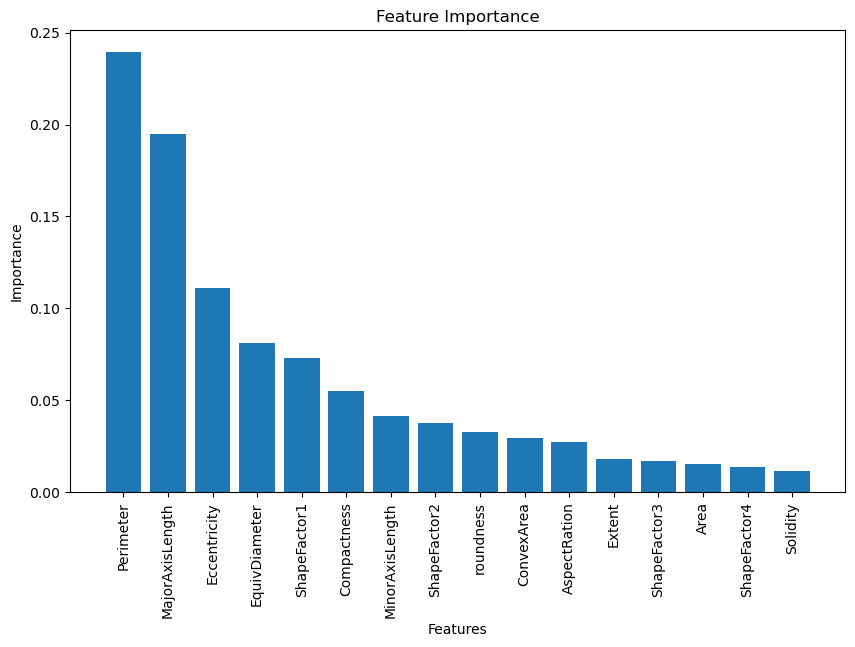

[codecarbon INFO @ 23:22:27] Energy consumed for RAM : 0.000363 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:22:27] Energy consumed for all CPUs : 0.000604 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:22:27] 0.000967 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:22:27] Energy consumed for RAM : 0.021133 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:22:27] Energy consumed for all CPUs : 0.035231 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:22:27] 0.056364 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:22:35] Energy consumed for RAM : 0.020450 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:22:35] Energy consumed for all CPUs : 0.034089 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:22:35] 0.054539 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:22:42] Energy consumed for RAM : 0.000375 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:22:42] Energy consumed for all CPUs : 0.000625 kWh. Total CPU Power : 5.0 W
[codecarbon

In [ ]:
# TODO: Complete plot_feature_importance() in random_forest.py

random_forest.plot_feature_importance(X)

Note that there isn't one "correct" answer here. We simply want you to investigate how different features in your random forest contribute to predicting the target variable.

Also note that: the number of features can be different if you change max_features value since it ends up changing the number of features considered in bootstrapped datasets.


# 4: (Bonus for All) SVM [7.8%] <span style="color:green">**[W]**</span> <span style="color:blue">**[P]**</span>


## 4.1 Fitting an SVM classifier by hand [5.5%] <span style="color:green">**[W]**</span>

Consider a dataset with the following points in two-dimensional space:

| $$x_1$$ | $$x_2$$ | $$y$$ |
| ------- | ------- | ----- |
| 0      | 0      | -1    |
| 0      | 4       | -1    |
| 4       | 0      | -1    |
| 4       | 4       | 1     |
| 8       | 0       | 1     |
| 8       | 8       | 1     |

Here, $x_1$ and $x_2$ are features and $y$ is the label.

The max margin classifier has the formulation,

$$\min{||\mathbf{\theta}||^2} $$

$$s.t.\ y_i(\mathbf{x_i} \mathbf{\theta} + b) ≥ 1 \ \ \ \ \forall \ i$$

**Hint:** $\mathbf{x_i}$ are the suppport vectors. Margin is equal to $\frac{1}{||\mathbf{\theta}||}$ and full margin is equal to $\frac{2}{||\mathbf{\theta}||}$. You might find it useful to plot the points in a 2D plane. When calculating the $\theta$ you don't need to consider the bias term.

(1) Are the points linearly separable? Does adding the point $\mathbf{x} = (8, 4)$, $y = -1$ change the separability? (2 pts)

(2) According to the max-margin formulation, find the separating hyperplane. Do not consider the new point from part 1 in your calculations for this current question or subsequent parts. ( Provide an explanation or calculation detailing how you determined the hyperplane, you may solve this question graphically.) (4 pts)

(3) Find a vector parallel to the optimal vector $\mathbf{\theta}$. (Hint: Recall whether the optimal vector is parallel or perpendicular to the separating hyperplane.) (4 pts)

(4) Calculate the value of the margin (single-sided) achieved by this $\mathbf{\theta}$? (4 pts)

(5) Solve for $\mathbf{\theta}$, given that the margin is equal to $1/||\mathbf{\theta}||$. (4 pts)

(6) If we remove one of the points from the original data the SVM solution might change. Find all such points which change the solution. (2 pts)

(7) Plot the features $x_1$ and $x_2$, based on label $y$ (use different color for different label), ignoring the hypothetical point mentioned in part (1). Please also include the separating hyperplane in the plot (4 pts)

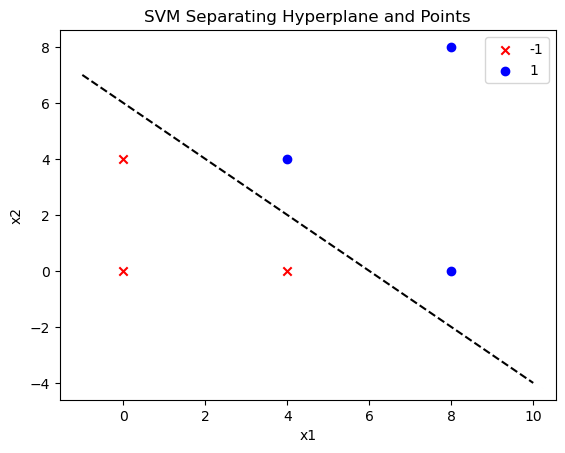

[codecarbon INFO @ 23:23:05] Energy consumed for RAM : 0.020475 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:05] Energy consumed for all CPUs : 0.034131 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:05] 0.054606 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:23:05] 0.001010 g.CO2eq/s mean an estimation of 31.836746686480854 kg.CO2eq/year
[codecarbon INFO @ 23:23:12] Energy consumed for RAM : 0.000400 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:12] Energy consumed for all CPUs : 0.000667 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:12] 0.001067 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:23:12] 0.001010 g.CO2eq/s mean an estimation of 31.835947139608955 kg.CO2eq/year
[codecarbon INFO @ 23:23:12] Energy consumed for RAM : 0.021171 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:12] Energy consumed for all CPUs : 0.035293 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:12] 0.056464 kWh of electricity used since the b

In [ ]:
# TODO (question 7): plot the points listed in the table

import matplotlib.pyplot as plt

# Points
points = [
    (0, 0, -1),
    (0, 4, -1),
    (4, 0, -1),
    (4, 4, 1),
    (8, 0, 1),
    (8, 8, 1)
]

neg_points = [(x1, x2) for x1, x2, y in points if y == -1]
pos_points = [(x1, x2) for x1, x2, y in points if y == 1]

# Plot points
plt.scatter(*zip(*neg_points), color='red', marker='x', label='-1')
plt.scatter(*zip(*pos_points), color='blue', marker='o', label='1')

# Plot separating hyperplane
x_vals = np.linspace(-1, 10, 100)
y_vals = 6 - x_vals  # From the equation x1 + x2 = 6
plt.plot(x_vals, y_vals, 'k--')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM Separating Hyperplane and Points')
plt.show()


## 4.2 Feature Mapping [2.3%] <span style="color:blue">**[P]**</span>

Let's look at a dataset where the datapoint can't be classified with a good accuracy using a linear classifier. Run the cell bellow to generate the dataset.

We will also see what happens when we try to fit a linear classifier to the dataset.

there are some suggestion readings:

https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf

https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

https://www.sjsu.edu/faculty/guangliang.chen/Math251F18/lec6svm.pdf


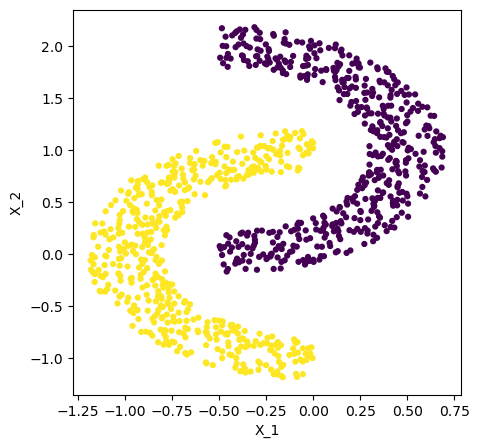

[codecarbon INFO @ 23:23:20] Energy consumed for RAM : 0.020487 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:20] Energy consumed for all CPUs : 0.034152 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:20] 0.054639 kWh of electricity used since the beginning.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# Generate dataset

random_state = 1

np.random.seed(0)
theta = np.linspace(0, 2 * np.pi, 1000)
r = np.random.uniform(0.8, 1.2, 1000)
X = np.column_stack([r * np.cos(theta), r * np.sin(theta)])
y = np.logical_or(theta < np.pi, theta >= 2 * np.pi)
X[y == 0, 0] += 1
X[y == 0, 1] += 0.5

R = np.array([[0, -1], [1, 0]])

X_rotated = X.dot(R.T)

X_train, X_test, y_train, y_test = train_test_split(
    X_rotated, y, test_size=0.20, random_state=random_state
)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c=y, marker="o", s=12)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################


def visualize_decision_boundary(X, y, feature_new=None, h=0.02):
    """
    You don't have to modify this function

    Function to vizualize decision boundary

    feature_new is a function to get X with additional features
    """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_1, xx_2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    if X.shape[1] == 2:
        Z = svm_cls.predict(np.c_[xx_1.ravel(), xx_2.ravel()])
    else:
        X_conc = np.c_[xx_1.ravel(), xx_2.ravel()]
        X_new = feature_new(X_conc)
        Z = svm_cls.predict(X_new)
    Z = Z.reshape(xx_1.shape)

    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    plt.contourf(xx_1, xx_2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.xlim(xx_1.min(), xx_1.max())
    plt.ylim(xx_2.min(), xx_2.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

[codecarbon INFO @ 23:23:27] Energy consumed for RAM : 0.000413 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:27] Energy consumed for all CPUs : 0.000688 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:27] 0.001100 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:23:27] Energy consumed for RAM : 0.021183 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:27] Energy consumed for all CPUs : 0.035314 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:27] 0.056497 kWh of electricity used since the beginning.


/opt/anaconda3/envs/ml_hw4/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy on test dataset: 0.865


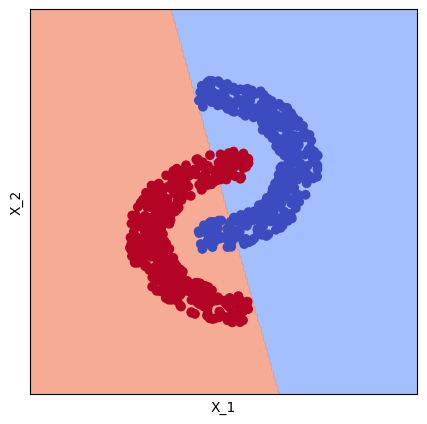

[codecarbon INFO @ 23:23:35] Energy consumed for RAM : 0.020500 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:35] Energy consumed for all CPUs : 0.034173 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:35] 0.054672 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:23:42] Energy consumed for RAM : 0.000425 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:42] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:42] 0.001134 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:23:42] Energy consumed for RAM : 0.021196 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:42] Energy consumed for all CPUs : 0.035335 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:23:42] 0.056531 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:23:50] Energy consumed for RAM : 0.020512 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:23:50] Energy consumed for all CPUs : 0.034193 kWh. Total CPU Power : 5.0 W
[codecarbon

In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# Try to fit a linear classifier to the dataset


svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))

visualize_decision_boundary(X_train, y_train)

We can see that we need a non-linear boundary to be able to successfully classify data in this dataset. By mapping the current feature x to a higher space with more features, linear SVM could be performed on the features in the higher space to learn a non-linear decision boundary. In feature.py, modify create_nl_feature() to add additional features which can help classify in the above dataset. After creating the additional features use code in the further cells to see how well the features perform on the test set.

**Note:** You should get a test accuracy above 85%

**Hint:** Think of the shape of the decision boundary that would best separate the above points. What additional features could help map the linear boundary to the non-linear one? Look at [this](https://xavierbourretsicotte.github.io/Kernel_feature_map.html) for a detailed analysis of doing the same for points separable with a circular boundary

<strong>TODO:</strong> Implement the <strong>create_nl_feature</strong> function in <strong>feature.py</strong>. There are many possible solutions to producing a decision boundary; think creatively!


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
from feature import create_nl_feature

X_new = create_nl_feature(X_rotated)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.20, random_state=random_state
)

Accuracy on test dataset: 0.865


/opt/anaconda3/envs/ml_hw4/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


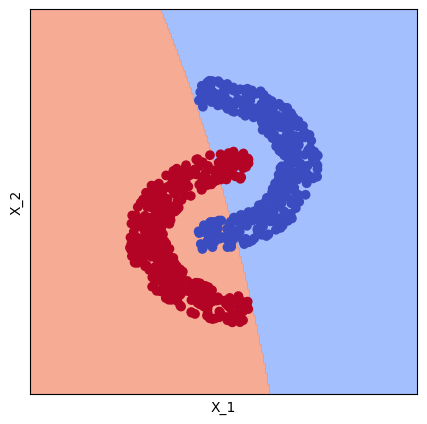

[codecarbon INFO @ 23:24:27] Energy consumed for RAM : 0.000463 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:24:27] Energy consumed for all CPUs : 0.000771 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:24:27] 0.001234 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:24:27] Energy consumed for RAM : 0.021233 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 23:24:27] Energy consumed for all CPUs : 0.035397 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 23:24:27] 0.056631 kWh of electricity used since the beginning.


In [ ]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################
# Fit to the new features and vizualize the decision boundary
# You should get more than 90% accuracy on test set

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))

visualize_decision_boundary(X_train, y_train, create_nl_feature)

In [ ]:
tracker.stop()

[codecarbon WARNING @ 00:20:51] Tracker already stopped !
[codecarbon WARNING @ 00:20:51] Background scheduler didn't run for a long period (176181s), results might be inaccurate
[codecarbon INFO @ 00:20:51] Energy consumed for RAM : 0.147283 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:20:51] Energy consumed for all CPUs : 0.245471 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:20:51] 0.392754 kWh of electricity used since the beginning.


0.178462605807696

[codecarbon INFO @ 00:20:55] Energy consumed for RAM : 0.168015 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:20:55] Energy consumed for all CPUs : 0.280084 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:20:55] 0.448098 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:20:55] 0.001009 g.CO2eq/s mean an estimation of 31.821365511660588 kg.CO2eq/year
[codecarbon INFO @ 00:21:03] Energy consumed for RAM : 0.167331 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:21:03] Energy consumed for all CPUs : 0.278942 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:21:03] 0.446273 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:21:10] Energy consumed for RAM : 0.168027 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 00:21:10] Energy consumed for all CPUs : 0.280104 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 00:21:10] 0.448132 kWh of electricity used since the beginning.
[codecarbon INFO @ 00:21:18] Energy consumed for RAM : 0.167344 kWh. RAM Power : 3.0 W
[codec